# Exploratory Data Analysis On Marketing Data.

## Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None

In [3]:
import mk_function as fn

## Data

In [4]:
data = pd.read_csv("marketing_data.csv")
accept_df = data[[col for col in data.columns if "Accepted" in col]]

## Uncleaned Data Inspection

In [5]:
print(f"There are {data.shape[0]} Rows and {data.shape[1]} Columns")

There are 2240 Rows and 28 Columns


In [6]:
data.sample(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
393,9392,1971,Graduation,Single,"$26,954.00",1,0,5/8/14,17,4,...,2,7,0,0,0,0,0,0,0,SP
2037,2747,1988,PhD,Married,"$67,546.00",0,0,8/31/12,90,864,...,5,3,0,0,0,0,0,0,0,SP
2115,5324,1981,PhD,Married,"$58,293.00",1,0,1/19/14,94,173,...,6,5,0,0,0,0,0,0,0,US
1213,8720,1978,2n Cycle,Together,NaN,0,0,8/12/12,53,32,...,1,0,0,1,0,0,0,0,0,IND


### Features Definations

Year_Birth          ::: Customer's birth year.   
Education           ::: Customer's Education level.  
Income              ::: Customer's Yearly household income.  
Kidhome             ::: Number of kids in Customer's household.  
Teenhome            ::: Number of Teenagers in Customer's household.  
Dt_Customer         ::: Date of Customer's enrollment with the company.  
Recency             ::: Number of days since Customer's last Purchase.  

----------------------
MntWines            ::: Amount spent on wine in the last 2 Years.  
MntFruits           ::: Amount spent on fruits in the last 2 Years.  
MntMeatProducts     ::: Amount spent on meat Products in the last 2 Years.  
MntFishProducts     ::: Amount spent on fish Products in the last 2 Years.  
MntSweetProduct     ::: Amount spent on sweets Products in the last 2 Years.  
MntGoldProds        ::: Amount spent on gold Products in the last 2 Years.  

----------------------
NumDealsPurchase    ::: Number of purchases made with a discount.  
NumWebPurchases     ::: Number of purchases made with through the company's web site.  
NumCatalogPurchases ::: Number of purchases made using a catalogue.  
NumStorePurchases   ::: Number of purchases made directly in stores.  
NumWebVisitMonthy   ::: Number of visits to Company's web site in the last month.  

----------------------
AcceptedCmp3        ::: 1: customer accepted the offer in the 3rd campaign, 0 otherwise.  
AcceptedCmp4        ::: 1: customer accepted the offer in the 4th campaign, 0 otherwise.    
AcceptedCmp5        ::: 1: customer accepted the offer in the 5th campaign, 0 otherwise.  
AcceptedCmp1        ::: 1: customer accepted the offer in the 1st campaign, 0 otherwise.  
AcceptedCmp2        ::: 1: customer accepted the offer in the 2nd campaign, 0 otherwise.  

----------------------
Response            ::: 1: customer accepted the offer in the last campaign, 0 otherwise.  
Complain            ::: 1: customer Complained in the last 2 years, 0 otherwise.  
Country             ::: Customer's Location

### Missing values

In [7]:
missing_value = pd.DataFrame(data.isnull().sum()).sort_values(by = 0, ascending = False).rename(columns = {0: "Sum of Missing values"})
missing_value["% of Missing values"] = round(missing_value["Sum of Missing values"] / data.shape[0] * 100, 2)
missing_value

,Sum of Missing values,% of Missing values
Income,24,1.07
ID,0,0.00
NumDealsPurchases,0,0.00
Complain,0,0.00
Response,0,0.00
AcceptedCmp2,0,0.00
AcceptedCmp1,0,0.00
AcceptedCmp5,0,0.00
AcceptedCmp4,0,0.00
AcceptedCmp3,0,0.00


## Data Cleaning

In [8]:
data = fn.clean_data(data)

### Outliers

,Income,Age
0.01,7705.92,23.0
0.05,19101.05,27.0
0.25,35538.75,38.0
0.50,51381.50,45.0
0.75,68289.75,56.0
0.95,83927.00,65.0
0.99,94437.68,70.0
1.00,666666.00,122.0


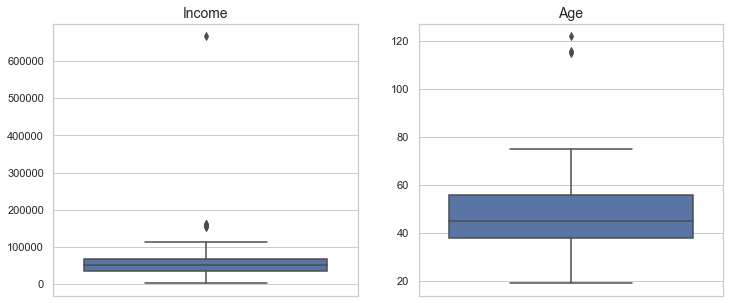

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

fn.sub_boxplot(data, y_col = "Income", axis = ax1, title = "Income")
fn.sub_boxplot(data, y_col = "Age", axis = ax2, title = "Age")

data[["Income", "Age"]].quantile([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99, 1])

In [10]:
# removing strong outliers.
data = data[(data["Income"] < 666666) & (data["Age"] < 100)]

## Cleaned Data Inspection

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Income               2236 non-null   float64       
 1   Marital_Status       2236 non-null   object        
 2   Kidhome              2236 non-null   int64         
 3   Teenhome             2236 non-null   int64         
 4   Dependent            2236 non-null   int64         
 5   Dt_Enroll            2236 non-null   datetime64[ns]
 6   Yr_joined            2236 non-null   int64         
 7   Mth_joined           2236 non-null   category      
 8   Age                  2236 non-null   int64         
 9   Education            2236 non-null   object        
 10  Country              2236 non-null   object        
 11  MntWines             2236 non-null   int64         
 12  MntFruits            2236 non-null   int64         
 13  MntMeatProducts      2236 non-nul

In [12]:
# Unique Categorical values

print("Unique Categorical values ::>", "\n")

for i in data.select_dtypes(include = ["object", "category"]).columns:
    print(f"{i} ::: {list(data[i].unique())}")
    print()

Unique Categorical values ::> 

Marital_Status ::: ['Divorced', 'Single', 'Married', 'Widow']

Mth_joined ::: ['June', 'May', 'April', 'March', 'January', 'December', 'October', 'September', 'August', 'July', 'February', 'November']

Education ::: ['Bsc', 'PhD', 'Undergraduate', 'Master', 'Basic']

Country ::: ['Spain', 'Canada', 'United State', 'Australia', 'Germany', 'India', 'South Africa', 'Mexico']

AcceptedCmp1 ::: ['No', 'Yes']

AcceptedCmp2 ::: ['No', 'Yes']

AcceptedCmp3 ::: ['No', 'Yes']

AcceptedCmp4 ::: ['No', 'Yes']

AcceptedCmp5 ::: ['No', 'Yes']

Response ::: ['Yes', 'No']

Complain ::: ['No', 'Yes']



---
## Exploratory Data Analysis

### Analysis Questions.

::: What **period** had the highest Enrollment of customers.   
::: How did customer **Age** influence their decisions.  
::: How does customer's **Income** influence other variables.  
::: What are the most **Purchased products** by customers.  
::: What is the highest preforming sales **Channels** used by customers.  
::: What are the best performing **Campaigns** 

### Periods with the highest Enrollment of customers.

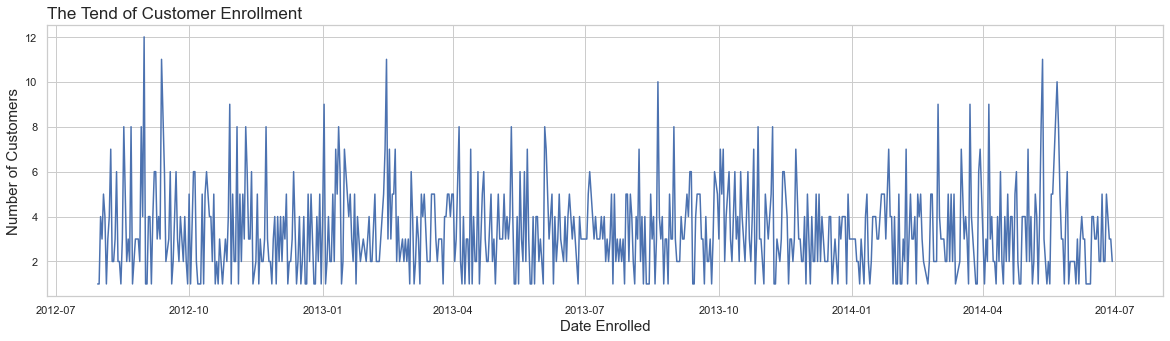

In [13]:
dt = pd.DataFrame(data["Dt_Enroll"].value_counts()).reset_index().rename(columns = {"index": "date enrolled", "Dt_Enroll": "count"})

fn.figsize(20, 5)
sns.lineplot(data = dt, x = "date enrolled", y = "count")
fn.labs(xlabel = "Date Enrolled", 
        ylabel = "Number of Customers", 
        title  = "The Tend of Customer Enrollment", 
        axis_size = 15, title_size = 17, t_loc = "left")
plt.show()

Count Of Customer's Enrollment By Year ::> 



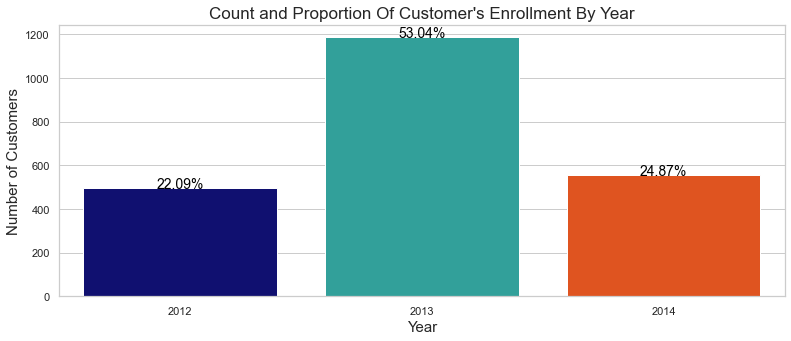

(<AxesSubplot:title={'center':"Count and Proportion Of Customer's Enrollment By Year"}, xlabel='Year', ylabel='Number of Customers'>,
    Year  count   prop
 0  2012    494  22.09
 1  2013   1186  53.04
 2  2014    556  24.87)

In [14]:
print("Count Of Customer's Enrollment By Year ::>", "\n")
fn.period_exp(df = data, period_col = "Yr_joined", col_name = "Year", pal = ["navy", "lightseagreen", "orangered"])

Count Of Customer's Enrollment By Month ::> 



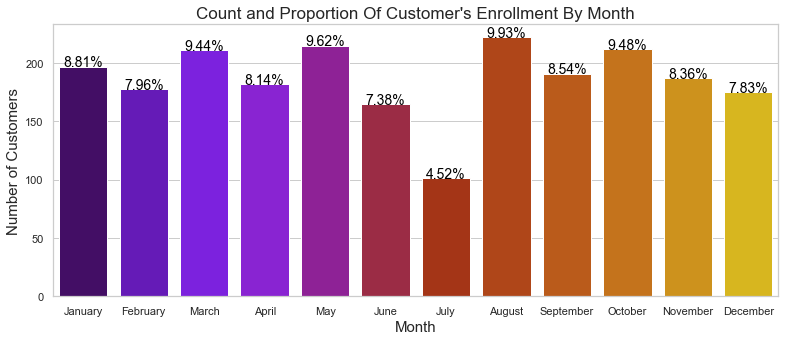

(<AxesSubplot:title={'center':"Count and Proportion Of Customer's Enrollment By Month"}, xlabel='Month', ylabel='Number of Customers'>,
         Month  count  prop
 0     January    197  8.81
 1    February    178  7.96
 2       March    211  9.44
 3       April    182  8.14
 4         May    215  9.62
 5        June    165  7.38
 6        July    101  4.52
 7      August    222  9.93
 8   September    191  8.54
 9     October    212  9.48
 10   November    187  8.36
 11   December    175  7.83)

In [15]:
print("Count Of Customer's Enrollment By Month ::>", "\n")
fn.period_exp(df = data, period_col = "Mth_joined", col_name = "Month", pal = "gnuplot")

Count and Proportion Of Customer's Enrollment By Month In Year ::> 



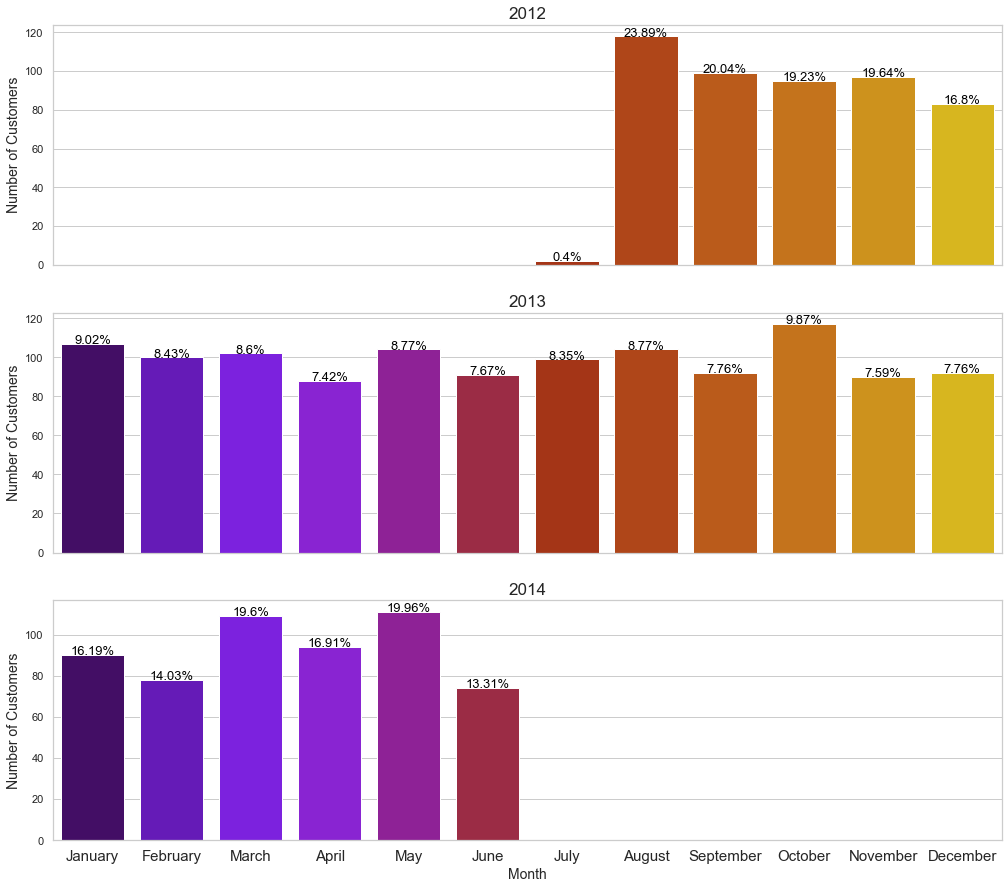

In [16]:
print("Count and Proportion Of Customer's Enrollment By Month In Year ::>", "\n")
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (17, 15))

fn.year_month(df = data, year= 2012, axis = ax1)
fn.year_month(df = data, year= 2013, axis = ax2)
fn.year_month(df = data, year= 2014, axis = ax3, xlab_c = True, tick_lab= True)
plt.show()

# Note empty bars have zero customer sign up.

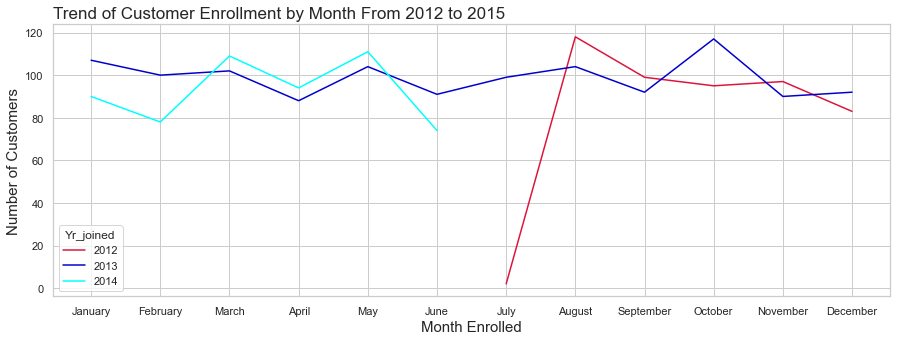

In [17]:
ym = data.groupby(["Yr_joined", "Mth_joined"])["Mth_joined"].value_counts()
ym.index = ym.index.droplevel(1)
ym = ym.reset_index(name = "count")

fn.figsize(15, 5)
sns.lineplot(data = ym, x = "Mth_joined", y = "count", estimator = None, hue = "Yr_joined", palette = ["crimson", "mediumblue", "aqua"])
fn.labs(xlabel = "Month Enrolled", ylabel = "Number of Customers", title = "Trend of Customer Enrollment by Month From 2012 to 2015", 
        axis_size = 15, title_size = 17, t_loc = "left")
plt.show()

In [18]:
# Date Information Subset Table
dt_info = data[["Dt_Enroll", "Yr_joined", "Mth_joined", "Country"]].copy()

# Creating Quarter column.
dt_info["qtr"] = np.nan
dt_info.loc[dt_info["Mth_joined"].isin(["January", "February", "March"]), "qtr"] = "First quarter"
dt_info.loc[dt_info["Mth_joined"].isin(["April", "May", "June"]), "qtr"] = "Second quarter"
dt_info.loc[dt_info["Mth_joined"].isin(["July", "August", "September"]), "qtr"] = "Third quarter"
dt_info.loc[dt_info["Mth_joined"].isin(["October", "November", "December"]), "qtr"] = "Fourth quarter"

dt_info["qtr"] = (dt_info["qtr"]
                  .astype("category")
                  .cat.reorder_categories(["First quarter", "Second quarter", "Third quarter", "Fourth quarter"], ordered = True) )

yq = dt_info.copy().groupby(["Yr_joined", "qtr"])["qtr"].value_counts()
yq.index = yq.index.droplevel(1)
yq = yq.reset_index(name = "count")
yq["prop"] = fn.prop_table(yq, "count", 2)

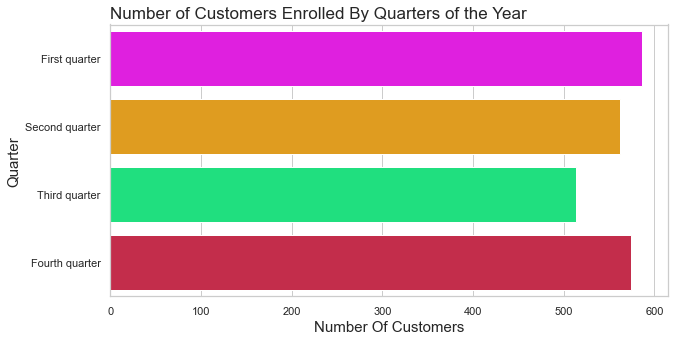

In [19]:
quarter_pal = ["fuchsia", "orange", "springgreen", "crimson"]

fn.figsize(10, 5)
sns.countplot(data = dt_info, y = "qtr", palette = quarter_pal)
fn.labs(xlabel= "Number Of Customers", ylabel= "Quarter", title= "Number of Customers Enrolled By Quarters of the Year", axis_size= 15, title_size= 17, t_loc= "left")
plt.show()

,Yr_joined,qtr,count,prop
0,2012,Third quarter,219,9.79
1,2012,Fourth quarter,275,12.30
2,2013,First quarter,309,13.82
3,2013,Second quarter,283,12.66
4,2013,Third quarter,295,13.19
5,2013,Fourth quarter,299,13.37
6,2014,First quarter,277,12.39
7,2014,Second quarter,279,12.48


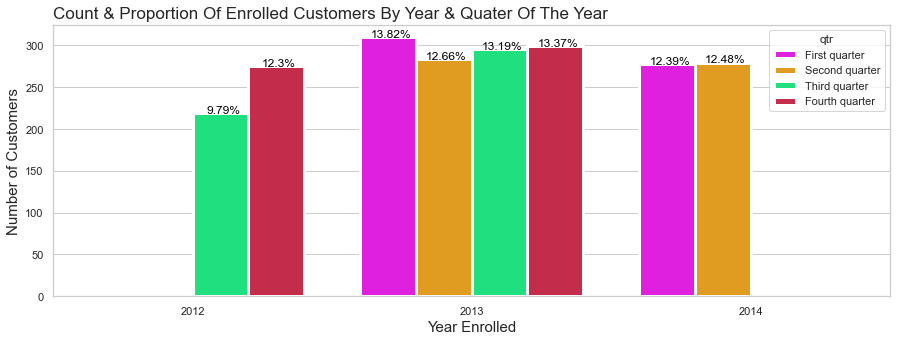

In [20]:
fn.figsize(15, 5)
pp = sns.barplot(data = yq, x = "Yr_joined", y = "count", hue = "qtr", linewidth = 3, palette = quarter_pal)
fn.labs(xlabel = "Year Enrolled", ylabel = "Number of Customers", title = "Count & Proportion Of Enrolled Customers By Year & Quater Of The Year", 
        axis_size = 15, title_size = 17, t_loc = "left")
fn.bar_text(df = yq, ax = pp, count_var = "count", hue = True)
    
yq

In [21]:
ymc = dt_info.copy().groupby(["Yr_joined", "Mth_joined", "Country"])["Mth_joined"].value_counts()
ymc.index = ymc.index.droplevel(1)
ymc = ymc.reset_index(name = "count")

dt_info["Country"].value_counts().reset_index(name = "count").rename(columns = {"index": "country"})

,country,count
0,Spain,1094
1,South Africa,335
2,Canada,268
3,Australia,160
4,India,147
5,Germany,120
6,United State,109
7,Mexico,3


<AxesSubplot:xlabel='Month Enrolled', ylabel='United State'>

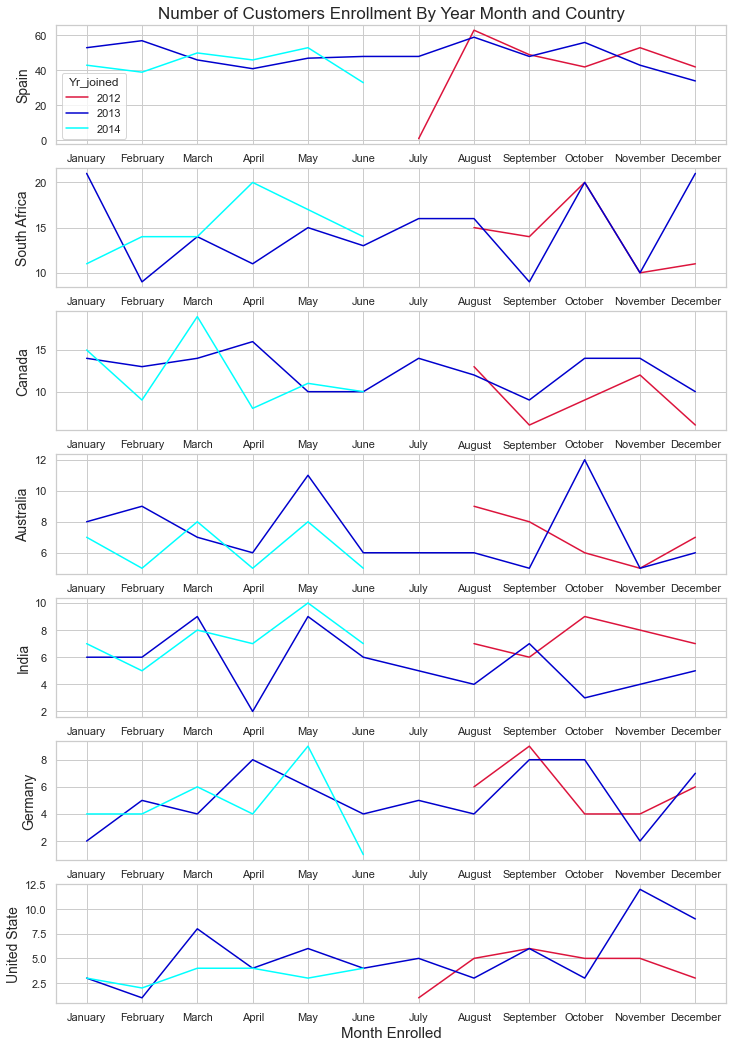

In [22]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, figsize = (12, 18))

title_d = "Number of Customers Enrollment By Year Month and Country"

fn.period_country(df = ymc, country = 'Spain',  axis = ax1, title = title_d, legend_rm = False, title_rm = False)
fn.period_country(df = ymc, country = 'South Africa', axis = ax2, legend_rm = True)
fn.period_country(df = ymc, country = 'Canada',    axis = ax3)
fn.period_country(df = ymc, country = 'Australia', axis = ax4)
fn.period_country(df = ymc, country = 'India',     axis = ax5)
fn.period_country(df = ymc, country = 'Germany',   axis = ax6)
fn.period_country(df = ymc, country = 'United State', axis = ax7,  xlabel_in = True)

* The Date of enrollment of customers ranges from July 30 2012 to June 29 2014, 
* The year 2013 had 12 active months (January - December) while 2012 and 2014 both had a maximum of 6 active  months (July - December) for 2012, (January - June) for 2014.
* Most customers (53.04%) Enrolled in 2013 while 2014 and 2012 had (24.87% and 22.09%) respectively which is mostly affected by their less active months.


There are little changes in Customer Enrollment for each months except for July which had a very low percentage.
* In 2012, August had the highest number of customer enrollment.
* In 2013 October had the highest number of enrollment.
* While in 2014 May had the highest number of enrollments.

* From 2012-2014, in general the First quarter had the highest Number of enrollment.  
* The Third quarter had the lowest number of enrollment from 2012-2014.
* The Fourth quarter had the second highest enrollment in general for all the years.
* While the Second quarter had the third highest number of customer enrollment.

Based on Enrollment by Country :::  
Spain had the highest Number of customers enrollment (1,094), and the Mexico had just (3) customers enrolled which was the lowest of all the countries. 

----------
----------

###  How did customer Age influence their decisions?

In [23]:
# Age Categorical variable
data["Age_cat"] = np.nan

data.loc[data["Age"] < 36, "Age_cat"] = "< 36"
data.loc[(data["Age"] >= 36) & (data["Age"] < 43), "Age_cat"] = "36-42"
data.loc[(data["Age"] >= 43) & (data["Age"] < 51), "Age_cat"] = "43-50"
data.loc[(data["Age"] >= 51) & (data["Age"] < 61), "Age_cat"] = "51-60"
data.loc[data["Age"] >= 61, "Age_cat"] = "> 61"

data["Age_cat"] = data["Age_cat"].astype("category").cat.reorder_categories(["< 36", "36-42", "43-50", "51-60", "> 61"], ordered = True)

<AxesSubplot:ylabel='Age'>

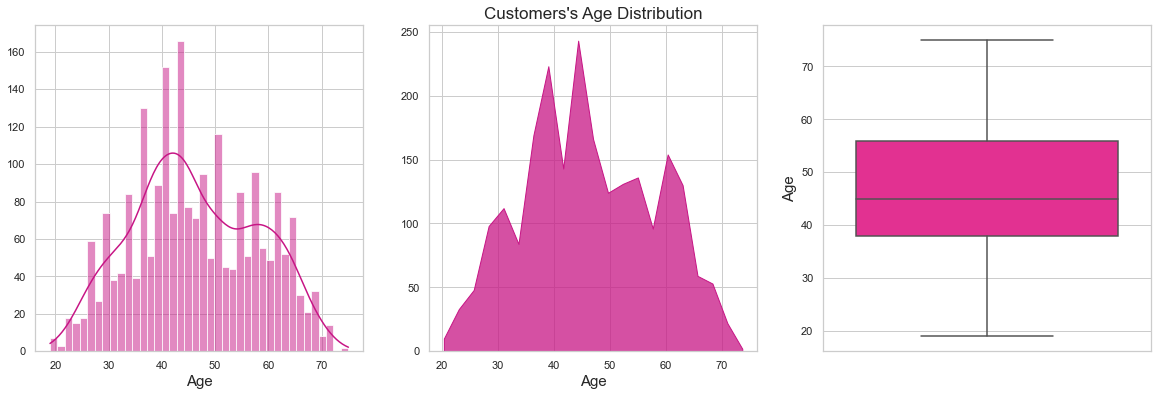

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (20, 6))

fn.subplots_n(df= data, x_col= "Age", axis = ax1, plt_type= "histogram", colr= "mediumvioletred", kde_f= True, bins_f = 40, x_lab= "Age", xlab_in= True)
fn.subplots_n(df= data, x_col= "Age", axis = ax2, plt_type= "histogram", colr= "mediumvioletred", element_f= "poly", title_f= "Customers's Age Distribution", 
              title_rm = False, x_lab = "Age", xlab_in = True)
fn.subplots_n(df= data, y_col= "Age", axis= ax3, plt_type= "boxplot", pal= ["deeppink"], y_lab= "Age", ylab_in= True)

In [25]:
data["Age"].describe()

count    2236.000000
mean       46.101968
std        11.703281
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max        75.000000
Name: Age, dtype: float64

----
Using 2015 as the current year the age distribution of customers shows that:
> The Average customer age is 46 years, the yongest customer age is 19 years and the oldest is 75 years.

> And there are more customers with in the age range of 38 years to 56 years.
----

#### Age and the amount spent on each products.

Correlation Between The Amount Spent On Each Products And Customer's Age ::> 



,variable,correlation
0,Age,1.000000
1,MntWines,0.162809
2,Total_MntSpent,0.113618
3,MntFishProducts,0.042359
4,MntMeatProducts,0.030729
5,MntSweetProducts,0.019379
6,MntFruits,0.013657


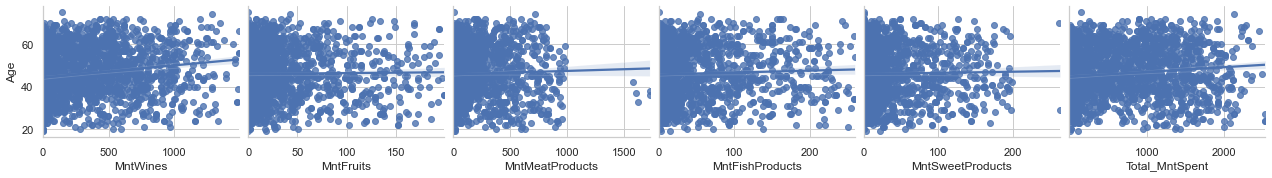

In [26]:
spend_vars = [col for col in data.columns if "Mnt" in col]

sns.pairplot(data = data, y_vars = "Age", x_vars = spend_vars, aspect = 1.2, height = 2.5, kind = "reg")

print("Correlation Between The Amount Spent On Each Products And Customer's Age ::>", "\n")
(
    data[spend_vars+["Age"]]
    .corr()["Age"]
    .sort_values(ascending = False)
    .reset_index(name = "correlation")
    .rename(columns = {'index':"variable"})
)

In [27]:
data.groupby("Age_cat")[spend_vars].describe(percentiles = [0.5]).T

Age_cat                        < 36        36-42        43-50        51-60  \
MntWines         count   424.000000   496.000000   533.000000   467.000000   
                 mean    249.297170   237.959677   302.273921   363.862955   
                 std     343.185986   300.057891   328.928964   339.708943   
                 min       0.000000     0.000000     0.000000     0.000000   
                 50%      55.500000    86.000000   167.000000   283.000000   
                 max    1478.000000  1486.000000  1396.000000  1492.000000   
MntFruits        count   424.000000   496.000000   533.000000   467.000000   
                 mean     28.617925    21.647177    25.814259    28.633833   
                 std      42.034493    36.768818    40.034633    40.794691   
                 min       0.000000     0.000000     0.000000     0.000000   
                 50%       9.500000     6.000000     7.000000    11.000000   
                 max     193.000000   199.000000   197.000000   194.000000   
MntMeatProducts  count   424.000000   496.000000   533.000000   467.000000   
                 mean    183.801887   138.453629   154.667917   175.156317   
                 std     255.755689   228.267365   215.536148   208.455662   
                 min       1.000000     0.000000     1.000000     1.000000   
                 50%      54.000000    45.000000    60.000000    93.000000   
                 max    1622.000000  1725.000000   974.000000   984.000000   
MntFishProducts  count   424.000000   496.000000   533.000000   467.000000   
                 mean     39.301887    32.227823    33.879925    40.873662   
                 std      56.251406    53.353732    50.754168    56.731760   
                 min       0.000000     0.000000     0.000000     0.000000   
                 50%      14.000000    10.000000    11.000000    15.000000   
                 max     258.000000   250.000000   229.000000   259.000000   
MntSweetProducts count   424.000000   496.000000   533.000000   467.000000   
                 mean     28.813679    24.118952    25.639775    27.807281   
                 std      41.893264    41.377493    40.849643    39.301155   
                 min       0.000000     0.000000     0.000000     0.000000   
                 50%      10.000000     7.000000     7.000000    11.000000   
                 max     263.000000   198.000000   195.000000   174.000000   
Total_MntSpent   count   424.000000   496.000000   533.000000   467.000000   
                 mean    572.292453   492.010081   585.450281   684.079229   
                 std     659.960698   557.556938   594.464528   575.987870   
                 min      10.000000     5.000000     6.000000     9.000000   
                 50%     175.000000   223.000000   325.000000   587.000000   
                 max    2525.000000  2257.000000  2486.000000  2352.000000   

Age_cat                        > 61  
MntWines         count   316.000000  
                 mean    396.401899  
                 std     354.936229  
                 min       0.000000  
                 50%     330.500000  
                 max    1493.000000  
MntFruits        count   316.000000  
                 mean     27.693038  
                 std      38.450926  
                 min       0.000000  
                 50%      12.500000  
                 max     194.000000  
MntMeatProducts  count   316.000000  
                 mean    197.892405  
                 std     214.392492  
                 min       2.000000  
                 50%     108.000000  
                 max     818.000000  
MntFishProducts  count   316.000000  
                 mean     44.734177  
                 std      56.707763  
                 min       0.000000  
                 50%      19.000000  
                 max     258.000000  
MntSweetProducts count   316.000000  
                 mean     30.759494  
                 std      43.769951  
                 min       0.000000  
           

#### Statistical summary of Customer's Age group and Anomunt spent on each Products 

Total Amount Spent On All Products by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,10,175.0,659.960698,2525,242652
1,36-42,5,223.0,557.556938,2257,244037
2,43-50,6,325.0,594.464528,2486,312045
3,51-60,9,587.0,575.987870,2352,319465
4,> 61,8,638.5,597.346257,2440,236787


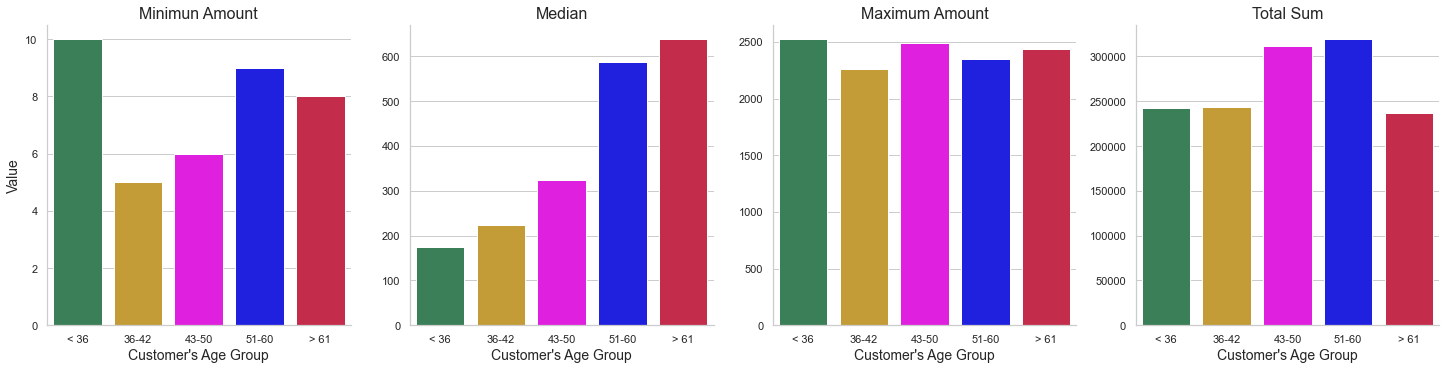

In [28]:
cag_pal = ["seagreen", "goldenrod", "magenta", "blue", "crimson"]

print("Total Amount Spent On All Products by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "Total_MntSpent", pal = cag_pal)

Total Amount Spent On Wines by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,0,55.5,343.185986,1478,105702
1,36-42,0,86.0,300.057891,1486,118028
2,43-50,0,167.0,328.928964,1396,161112
3,51-60,0,283.0,339.708943,1492,169924
4,> 61,0,330.5,354.936229,1493,125263


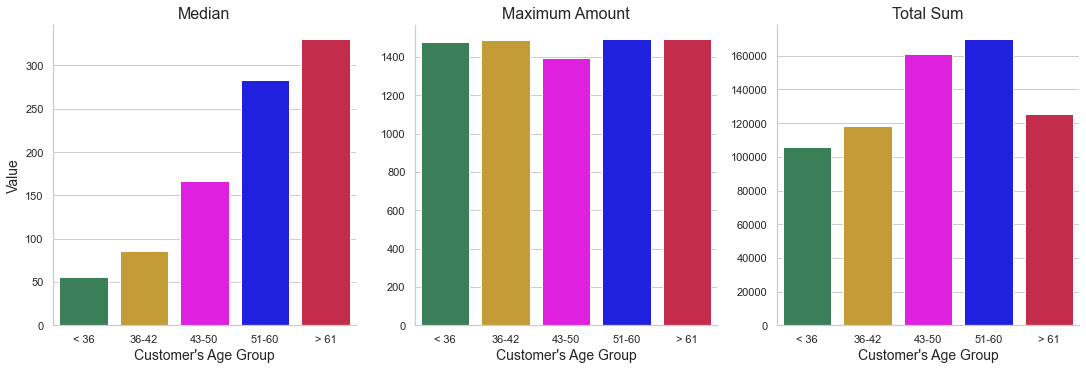

In [29]:
print("Total Amount Spent On Wines by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "MntWines", pal = cag_pal, drop = True)

Total Amount Spent On Fruits by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,0,9.5,42.034493,193,12134
1,36-42,0,6.0,36.768818,199,10737
2,43-50,0,7.0,40.034633,197,13759
3,51-60,0,11.0,40.794691,194,13372
4,> 61,0,12.5,38.450926,194,8751


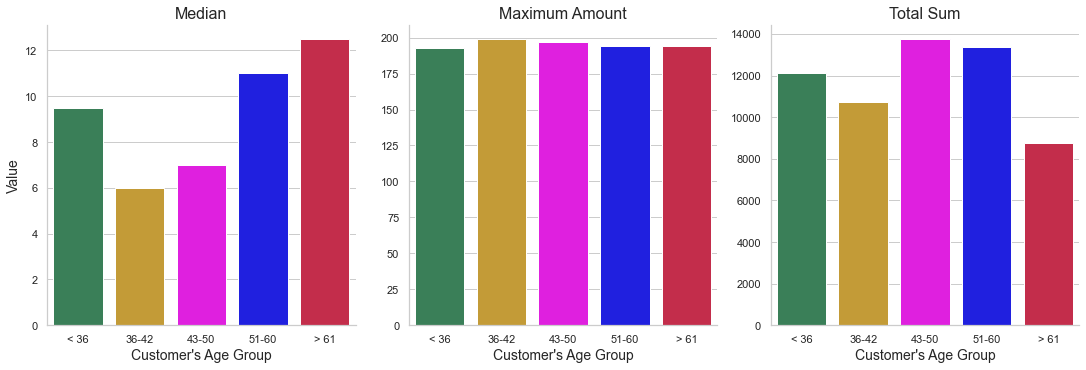

In [30]:
print("Total Amount Spent On Fruits by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "MntFruits", pal = cag_pal, drop = True)

Total Amount Spent On Meat Products by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,1,54,255.755689,1622,77932
1,36-42,0,45,228.267365,1725,68673
2,43-50,1,60,215.536148,974,82438
3,51-60,1,93,208.455662,984,81798
4,> 61,2,108,214.392492,818,62534


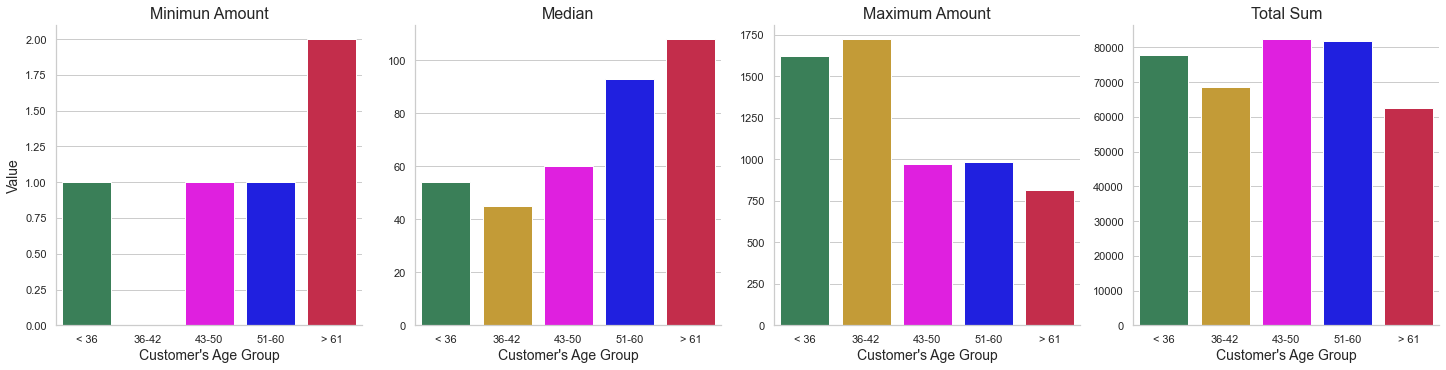

In [31]:
print("Total Amount Spent On Meat Products by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "MntMeatProducts", pal = cag_pal)

Total Amount Spent On Fish Products by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,0,14,56.251406,258,16664
1,36-42,0,10,53.353732,250,15985
2,43-50,0,11,50.754168,229,18058
3,51-60,0,15,56.731760,259,19088
4,> 61,0,19,56.707763,258,14136


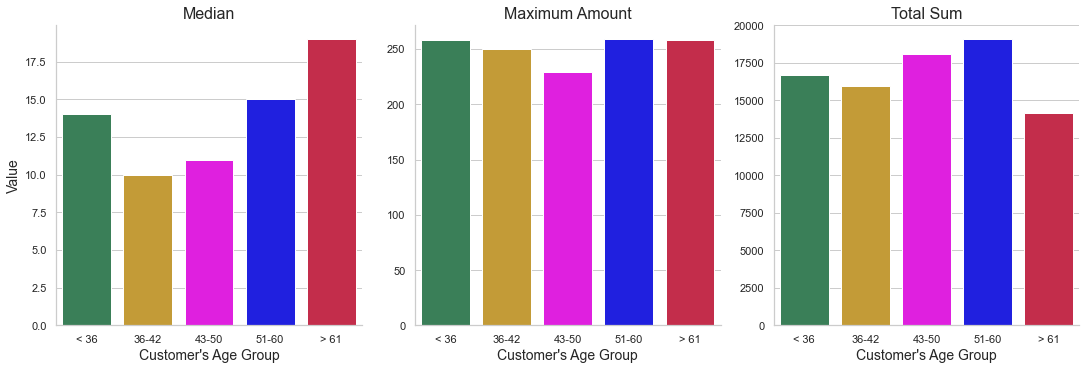

In [32]:
print("Total Amount Spent On Fish Products by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "MntFishProducts", pal = cag_pal, drop = True)

Total Amount Spent On Sweet Products by Customers by Age Group ::> 



,Age_cat,Minimun,Median,STD,Maximum,Sum
0,< 36,0,10.0,41.893264,263,12217
1,36-42,0,7.0,41.377493,198,11963
2,43-50,0,7.0,40.849643,195,13666
3,51-60,0,11.0,39.301155,174,12986
4,> 61,0,12.5,43.769951,262,9720


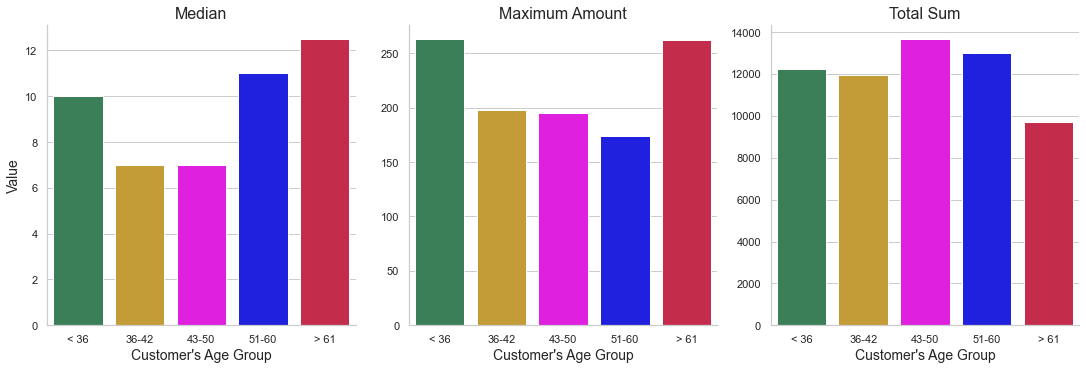

In [33]:
print("Total Amount Spent On Sweet Products by Customers by Age Group ::>", "\n")
fn.age_stat(df = data, gp_var = "Age_cat", sumy_var = "MntSweetProducts", pal = cag_pal, drop = True)

---
There is a weak correlation between customer's Age and Amount spent on each products, this indicate all customers by needed products regarless of their age.

The average amount spent on each products by customers changes in such that the older the customer the higher the average amount spent on each product. the same can be said for the Wine Product.

All products shows symmentry increase in Average amount spent as customer age group increase except for age group 35 and below which have a higher average amount than age group 36-42.

----
----

----
#### Age and channel of salse of each products.

In [34]:
data.groupby("Age_cat")[[col for col in data.columns if "Purchase" in col]].agg(["min", "median", "max", "sum", "count"]).reset_index()

Age_cat NumDealsPurchases                        NumWebPurchases             \
                        min median max   sum count             min median max   
0    < 36                 0      1  15   760   424               0      3  27   
1   36-42                 0      2  15  1224   496               0      3  11   
2   43-50                 0      2  15  1344   533               0      4  25   
3   51-60                 0      2  15  1173   467               0      4  11   
4    > 61                 0      2  11   700   316               0      4  27   

         ... NumStorePurchases                        Total_Purchase         \
    sum  ...               min median max   sum count            min median   
0  1481  ...                 0      4  13  2238   424              1      8   
1  1871  ...                 0      4  13  2654   496              0      9   
2  2255  ...                 0      5  13  3054   533              0     12   
3  2060  ...                 0      6  13  2955   467              0     15   
4  1473  ...                 0      6  13  2058   316              0     15   

                   
  max   sum count  
0  29  4730   424  
1  31  5633   496  
2  32  6598   533  
3  32  6488   467  
4  31  4605   316  

[5 rows x 26 columns]

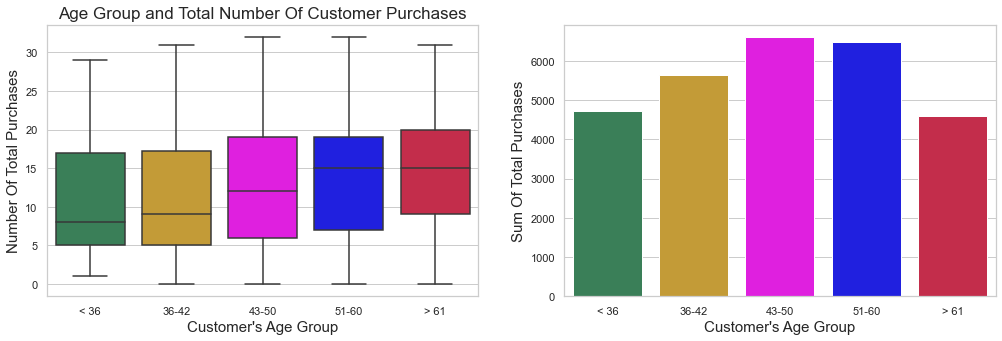

In [35]:
fn.age_purchase(df = data, gp_var = "Age_cat", sumy_var = "Total_Purchase", pal_f = cag_pal)

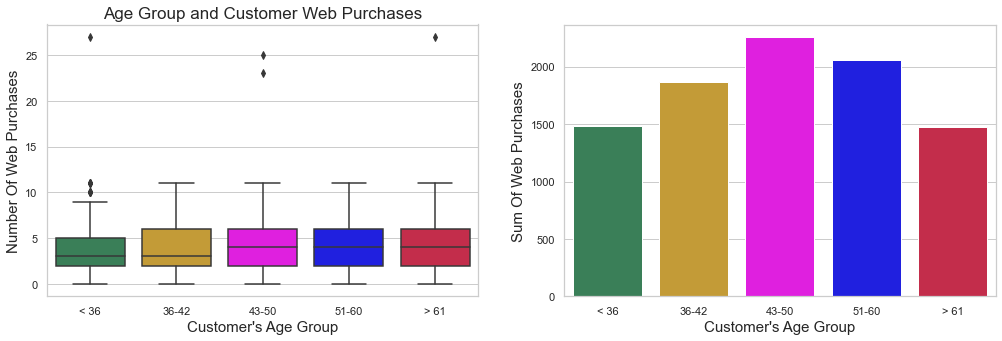

In [36]:
fn.age_purchase(df = data, gp_var = "Age_cat", sumy_var = "NumWebPurchases", pal_f = cag_pal)

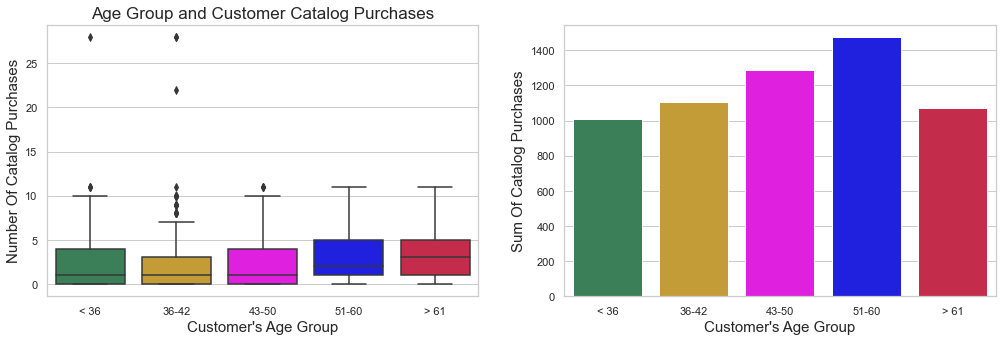

In [37]:
fn.age_purchase(df = data, gp_var = "Age_cat", sumy_var = "NumCatalogPurchases", pal_f = cag_pal)

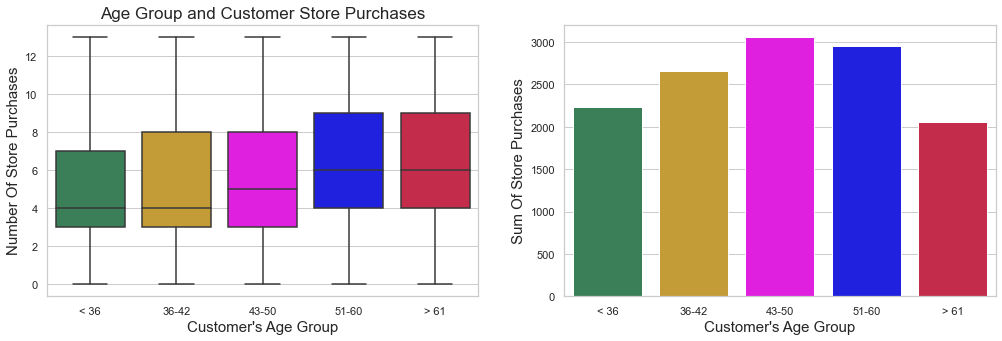

In [38]:
fn.age_purchase(df = data, gp_var = "Age_cat", sumy_var = "NumStorePurchases", pal_f = cag_pal)

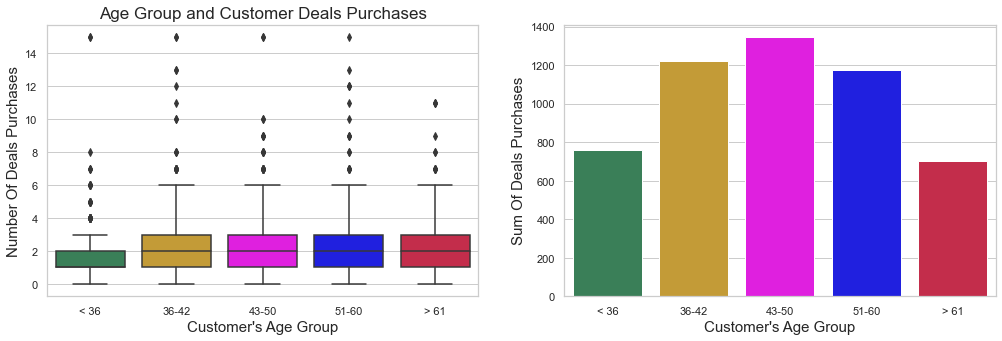

In [39]:
fn.age_purchase(df = data, gp_var = "Age_cat", sumy_var = "NumDealsPurchases", pal_f = cag_pal)

The above analysis of Age Group and The channel of purchases by customers reveal that the older a customers is the high average amount of purchases made through each Channel.

The sum of each purchase differ for customers within the age range of (36-42, 43-50, 51-60), they had a higher sum of purchase through each channel than the rest. this might majorly be influenced by the number of customers in the Age Group.

Age group 51-60 spent the highest through each channel than other age group except through catalog purchase where age group 51-60 spent the most.

---
---

#### Summary of Customer's Age and Campaign performance.

RESPONSE ::>


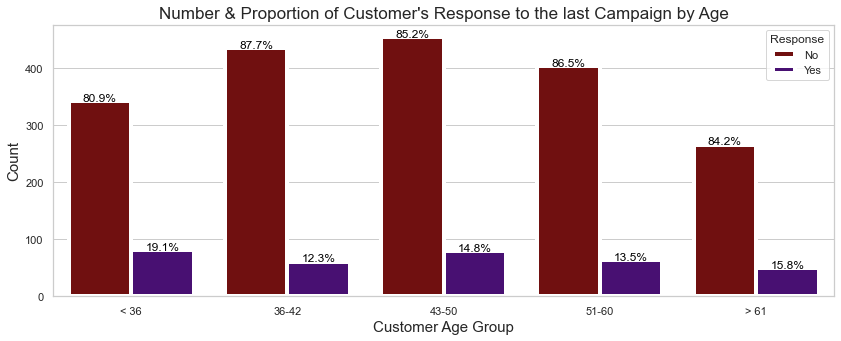

In [40]:
palette_f = ["maroon", "indigo"]

print("RESPONSE ::>")
fn.age_campaign(df = data, gp_var = "Response", pal = palette_f, response = True)

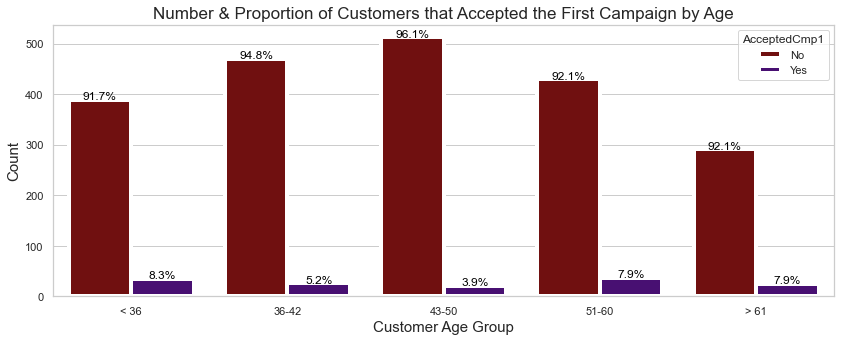

In [41]:
fn.age_campaign(df = data, gp_var = "AcceptedCmp1", pal = palette_f)

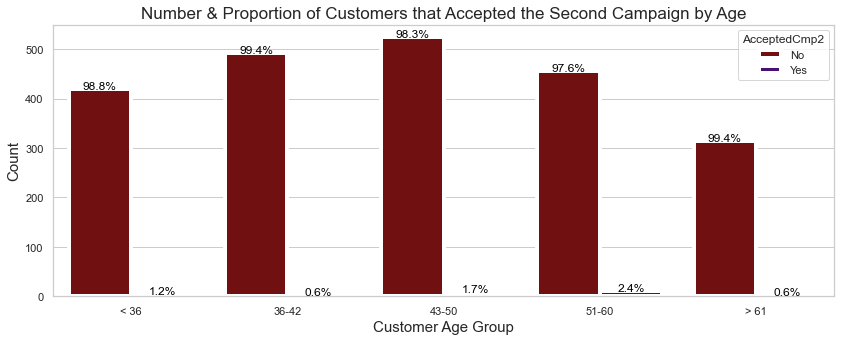

In [42]:
fn.age_campaign(df = data, gp_var = "AcceptedCmp2", pal = palette_f)

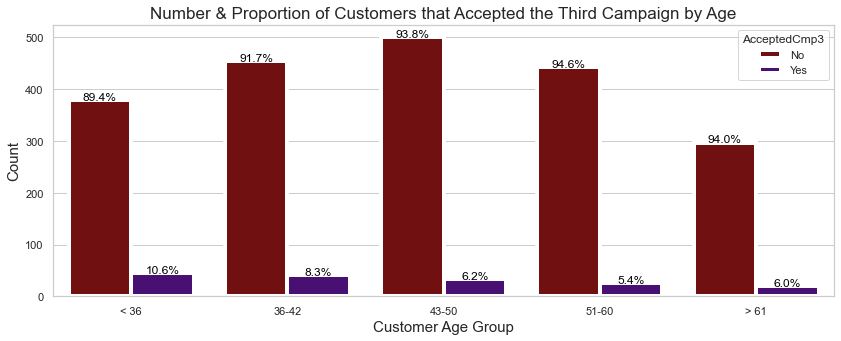

In [43]:
fn.age_campaign(df = data, gp_var = "AcceptedCmp3", pal = palette_f)

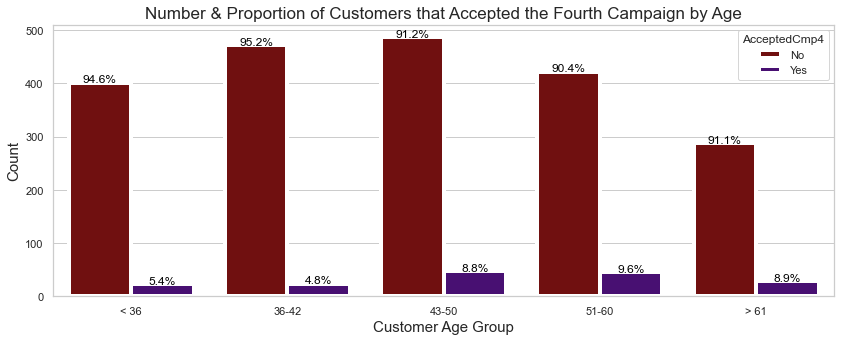

In [44]:
fn.age_campaign(df = data, gp_var = "AcceptedCmp4", pal = palette_f)

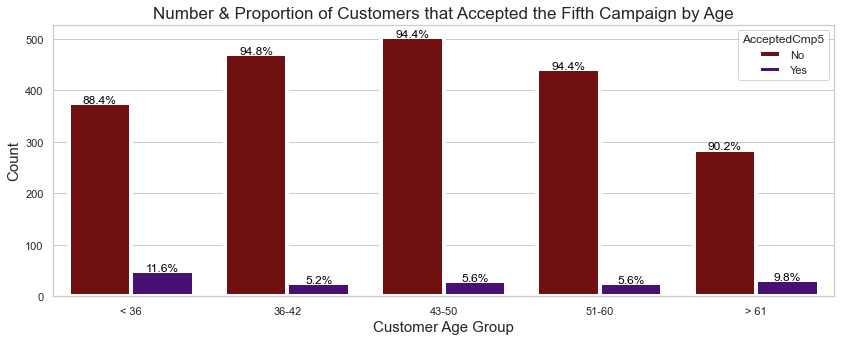

In [45]:
fn.age_campaign(df = data, gp_var = "AcceptedCmp5", pal = palette_f)

Accepted Campaign ::> 



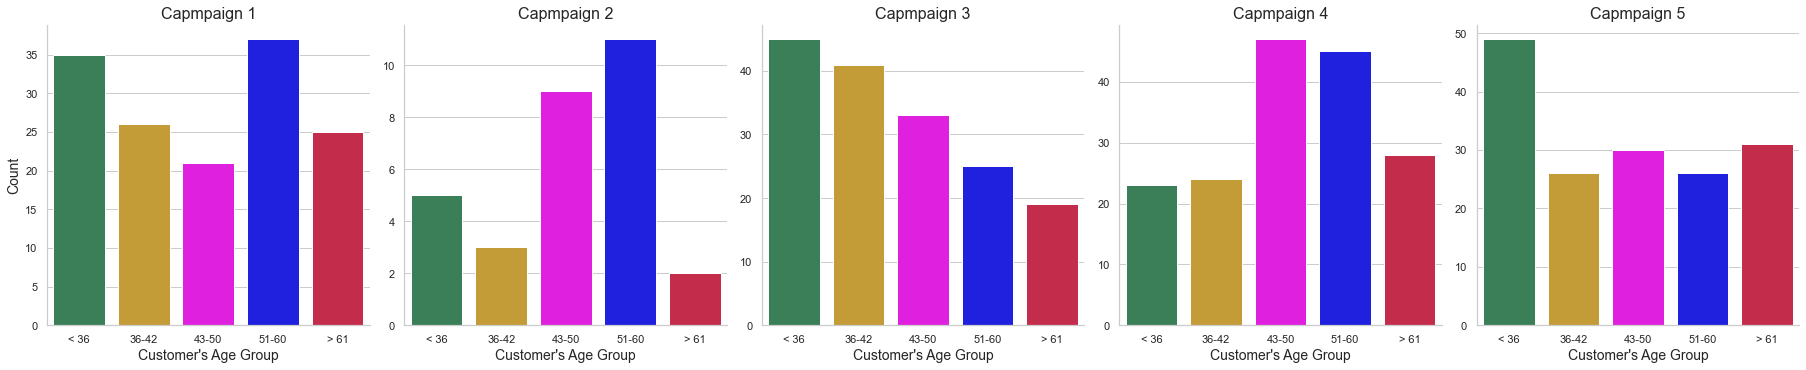

In [46]:
print("Accepted Campaign ::>", "\n")
ca = data.groupby(["Age_cat", "AcceptedCmp1"])["AcceptedCmp1"].count().reset_index(name = "Camp1Count")

for i in [f"AcceptedCmp{c}" for c in range(2, 6)]:
    ca[i] = data.groupby(["Age_cat", i])[i].count().reset_index(name = "count")[["count"]]
    
ca = ca.rename(columns = {"AcceptedCmp1": "Accepted",  "Camp1Count": "AcceptedCmp1"})
ca_m = ca.melt(id_vars = ["Age_cat", "Accepted"], value_vars = [f"AcceptedCmp{c}" for c in range(1, 6)], value_name = "Count")


g_f = sns.catplot(data = ca_m.query("Accepted == 'Yes'"), x = "Age_cat", y = "Count", col = "variable", kind = "bar", sharey = False, palette = cag_pal)
axes = g_f.axes.flatten()
axes[0].set_title("Capmpaign 1", size = 16)
axes[1].set_title("Capmpaign 2", size = 16)
axes[2].set_title("Capmpaign 3", size = 16)
axes[3].set_title("Capmpaign 4", size = 16)
axes[4].set_title("Capmpaign 5", size = 16)
g_f.set_axis_labels(x_var = "Customer's Age Group", y_var = "Count", size = 14)
plt.show()

For the 3rd and 5th Campaign, customers within age 35 and below had the best respose rate, Again for the 1st and 2nd campaign, customers within the age group 51-60 had the highest response rate, while for campaingn 4  customers within the age group 43-50 had the highest response rate than other age groups.

----

TOTAL CAMPAIGN ACCEPTED ::>


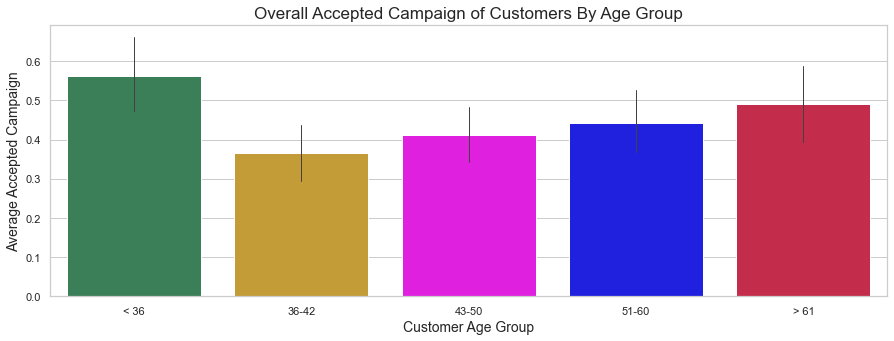

In [47]:
print("TOTAL CAMPAIGN ACCEPTED ::>")
fn.figsize(15, 5)
sns.barplot(data = data, x = "Age_cat", y = "Total_Accepted", palette = cag_pal, errwidth = 1)
fn.labs(xlabel = "Customer Age Group", ylabel = "Average Accepted Campaign", title = "Overall Accepted Campaign of Customers By Age Group")
plt.show()

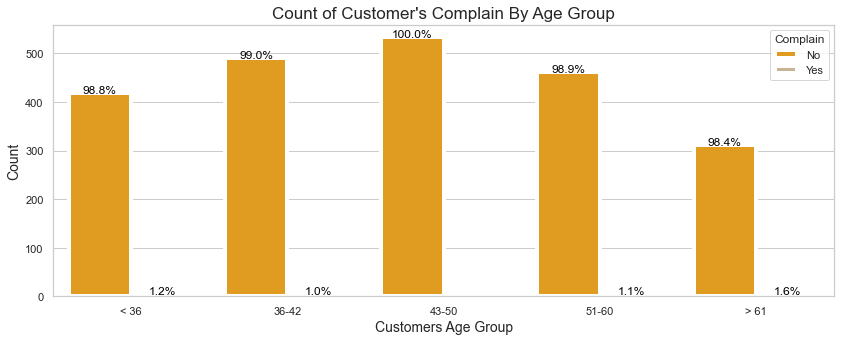

In [48]:
fn.age_campaign(df = data, gp_var = "Complain", pal = ["orange", "tan"])
fn.labs(title = "Count of Customer's Complain By Age Group", xlabel = "Customers Age Group", ylabel = "Count")
plt.show()

Customers within the age group 35 years and below accepted more campaings than other age groups, also there is a symmetric increase in acceptance of campaign as cuatomers age incerases this is with the exception of 35 year and below.

Very little complain was gotten from customers in general.  
Customers between the age of 43 to 50 did not make any complains, while above 60 years made the most complain.

-----
-----

### How customer's Income influence other variables.

,0,1,2,3,4,5,6,7
statistic,count,mean,std,min,25%,50%,75%,max
value,2236.0,51952.614043,21411.466851,1730.0,35502.5,51381.5,68275.75,162397.0


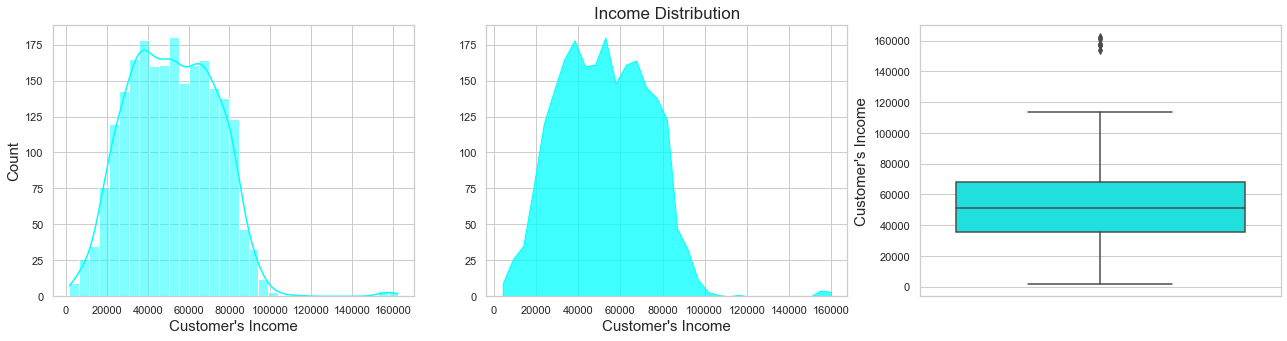

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize = (22, 5))

lab = "Customer's Income"

fn.subplots_n(df= data, x_col= "Income", plt_type= "histogram", axis= ax1, x_lab= lab, y_lab= "Count", xlab_in= True, ylab_in= True, kde_f= True, colr= "cyan")

fn.subplots_n(df= data, x_col= "Income", plt_type = "histogram", axis = ax2, x_lab = lab, xlab_in = True, title_f= "Income Distribution", title_rm= False,   
              element_f= "poly", colr = "cyan")

fn.subplots_n(df = data, y_col= "Income", axis= ax3, plt_type = "boxplot", pal = ["cyan"], y_lab = lab, ylab_in = True)

data["Income"].describe().reset_index(name = "value").rename(columns = {"index": "statistic"}).T

,Response,count,mean,std,min,25%,50%,75%,max
0,No,1902.0,50507.277340,20760.856847,1730.0,34535.25,50521.5,65839.25,162397.0
1,Yes,334.0,60183.244012,23164.266112,7500.0,39786.75,64044.0,80477.00,105471.0


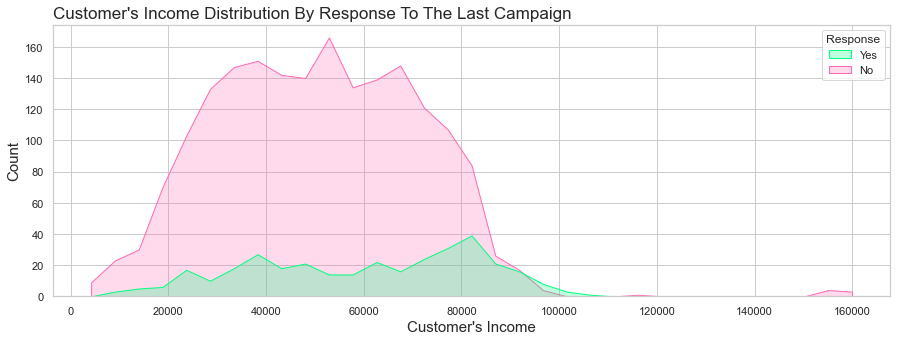

In [50]:
fn.figsize(15, 5)
sns.histplot(data = data, x = "Income", hue = "Response", element = "poly", palette = ["springgreen", "hotpink"])
fn.labs(xlabel = "Customer's Income", ylabel = "Count", title = "Customer's Income Distribution By Response To The Last Campaign", 
        axis_size= 15, title_size= 17, t_loc = "left")
data.groupby("Response")["Income"].describe().reset_index()

* The Average Customer household Income is 51,381.5, 
* Most customer household have income in within the range of 35,502.5 to 68,275.75.

* Customers that responded have a higher Average household income (64,044.0) than customers who did not respond (50,521.5)

----
----

#### Income and Total Amount Spent On Each Products

In [51]:
print("Correlation Of Amount Spent On Each product With Income ::>", "\n")

spend_vars = [col for col in data.columns if "Mnt" in col]
fn.income_corr(df = data, variables = spend_vars+["Income"])

Correlation Of Amount Spent On Each product With Income ::> 



,variable,correlation
0,Income,1.000000
1,Total_MntSpent,0.789375
2,MntWines,0.686080
3,MntMeatProducts,0.684176
4,MntFishProducts,0.518462
5,MntSweetProducts,0.518126
6,MntFruits,0.504911


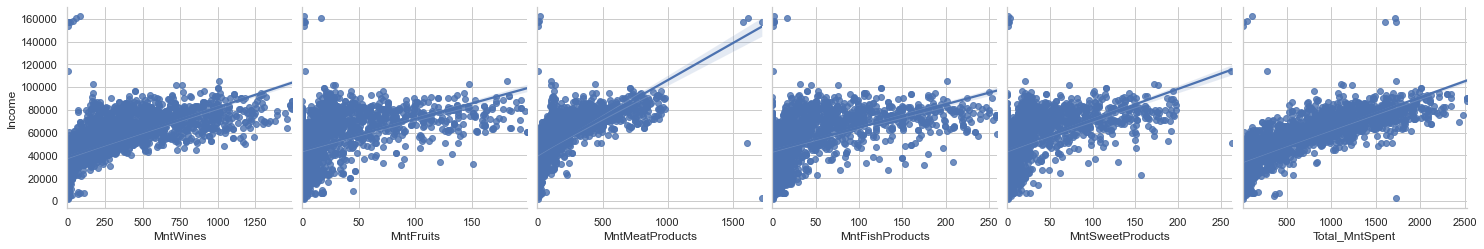

In [52]:
sns.pairplot(data = data, x_vars= spend_vars, y_vars = "Income", height = 3.5, kind = "reg")
plt.show()

In [53]:
print("Correlation of Income and Amount Spent on each Products by Response to Last Campaign ::>", "\n")

fn.income_corr(df = data, variables = spend_vars+["Income"], only_iv = False)

Correlation of Income and Amount Spent on each Products by Response to Last Campaign ::> 



,variable,Responded,No Response
0,Income,1.000000,1.000000
1,Total_MntSpent,0.844902,0.771207
2,MntMeatProducts,0.723174,0.671901
3,MntWines,0.703659,0.663912
4,MntSweetProducts,0.538738,0.504977
5,MntFishProducts,0.534172,0.502772
6,MntFruits,0.494107,0.495498


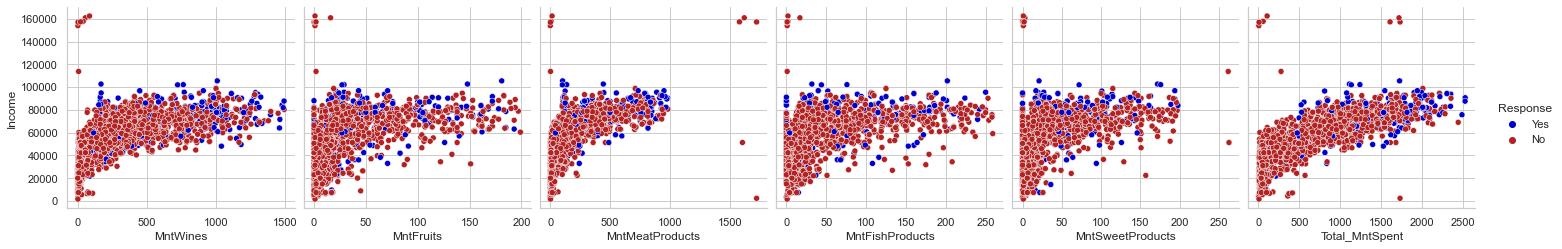

In [54]:
sns.pairplot(data = data, x_vars = spend_vars, y_vars = "Income", height = 3.5, hue = "Response", palette= ["mediumblue", "firebrick"])
plt.show()

The correlation between income and the total amount spent on all products shows that customers with higher household income spent more on each product than customer with low household income.

Wine and Meat product have a better correlation with household income than other products.

In relation to Customer's response to the last campaign:
* Customers who responded generally had a higher correlation with household income, except for the amount spent on fruit products.

----
----

#### Income and Sales Channel.

In [55]:
pur = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchase', 'NumDealsPurchases', 'NumWebVisitsMonth']

print("Correlation Of Sales Channels And Income ::>", "\n")
fn.income_corr(df = data, variables = pur+["Income"])

Correlation Of Sales Channels And Income ::> 



,variable,correlation
0,Income,1.000000
1,Total_Purchase,0.738647
2,NumCatalogPurchases,0.693781
3,NumStorePurchases,0.628075
4,NumWebPurchases,0.450584
5,NumDealsPurchases,-0.107169
6,NumWebVisitsMonth,-0.646382


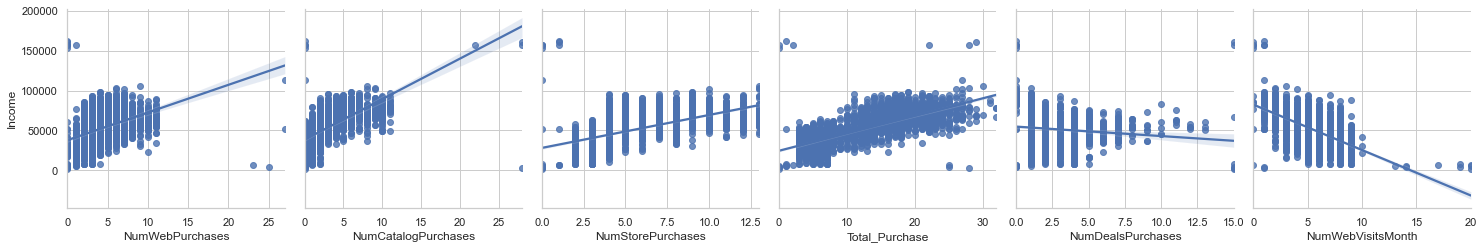

In [56]:
sns.pairplot(data = data, x_vars= pur, y_vars= "Income", height = 3.5, kind = "reg")
plt.show()

In [57]:
print("Correlation Between customer's Income and Sales Channels by Response ::>", "\n")
fn.income_corr(df = data, variables = pur+["Income"], only_iv = False)

Correlation Between customer's Income and Sales Channels by Response ::> 



,variable,Responded,No Response
0,Income,1.000000,1.000000
1,Total_Purchase,0.761997,0.727284
2,NumCatalogPurchases,0.708973,0.678293
3,NumStorePurchases,0.620948,0.633744
4,NumWebPurchases,0.417641,0.441919
5,NumDealsPurchases,-0.406161,-0.044432
6,NumWebVisitsMonth,-0.753030,-0.633662


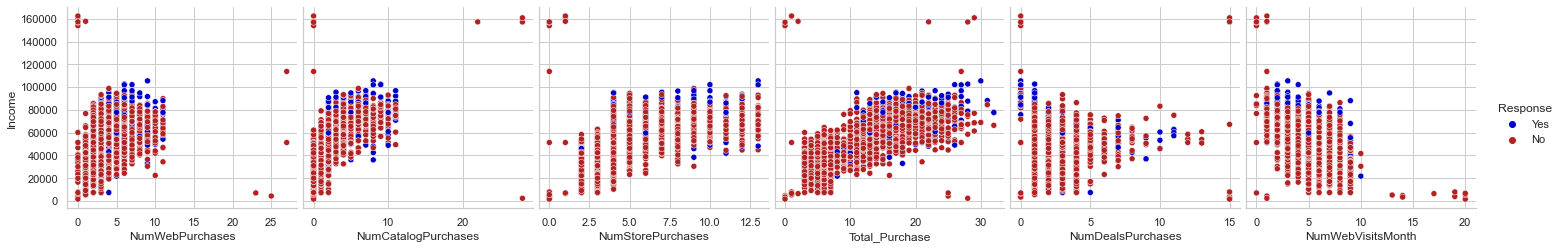

In [58]:
sns.pairplot(data = data, x_vars= pur, y_vars = "Income", height = 3.5, hue = "Response", palette = ["mediumblue", "firebrick"])
plt.show()

The correlation of Income and the various sales channels such as Web Purchases, Catalogue Purchases and Store Purchases with Total Purchase shows a positive relationship 
'As the household income increases so does the number of purchases made through these channels'

The number of discounted(deals) purchases made have a very low relationship with household income.
More low income households have higher visits to the company's website than high income households.

Including Response to the last Campaign, it shows that there was an increase in the relationship between Income and all channels of sales for the customer that responded.

----
----

#### Accepted Campaign and Income.

In [59]:
# dtt = data[[col for col in data.columns if "Accepted" in col][:5]+["Response"]]
dtt = pd.concat([accept_df, data[["Income", "Total_Accepted"]]], join = "inner", axis = 1)

print("Correlation Of Accepted Campaigns With Income using kendall method ::>", "\n")
fn.income_corr(df = dtt, only_df = True)

Correlation Of Accepted Campaigns With Income using kendall method ::> 



,variable,correlation
0,Income,1.000000
1,AcceptedCmp5,0.320951
2,AcceptedCmp1,0.268173
3,Total_Accepted,0.245934
4,AcceptedCmp4,0.181662
5,AcceptedCmp2,0.085929
6,AcceptedCmp3,-0.012114


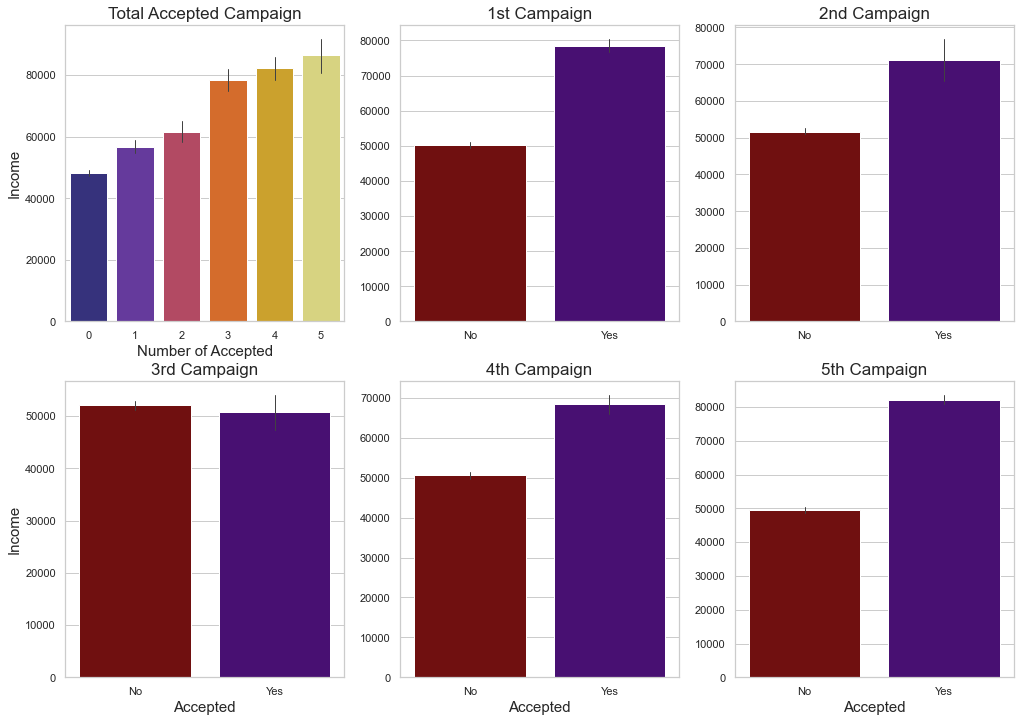

In [60]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (17, 12))

pai = ["maroon", "indigo"]

fn.subplots_n(df = data, x_col= "Total_Accepted", y_col = "Income", plt_type = "bar", axis = axs[0,0], x_lab= "Number of Accepted", y_lab= "Income", 
              xlab_in= True, ylab_in= True, title_f= "Total Accepted Campaign", title_rm= False,  pal = "CMRmap")

fn.subplots_n(df = data, x_col = "AcceptedCmp1", y_col = "Income", axis = axs[0,1], pal= pai, title_f= "1st Campaign", title_rm= False, plt_type = "bar")
fn.subplots_n(df = data, x_col = "AcceptedCmp2", y_col = "Income", axis = axs[0,2], pal= pai, title_f= "2nd Campaign", title_rm= False, plt_type = "bar")

fn.subplots_n(df = data, x_col = "AcceptedCmp3", y_col = "Income", axis = axs[1,0], pal= pai, title_f= "3rd Campaign", title_rm= False, 
              x_lab= "Accepted", y_lab= "Income", xlab_in= True, ylab_in= True, plt_type = "bar")

fn.subplots_n(df = data, x_col = "AcceptedCmp4", y_col = "Income", axis = axs[1,1], pal= pai, x_lab= "Accepted", xlab_in= True,
              title_f= "4th Campaign", title_rm= False, plt_type = "bar")
fn.subplots_n(df = data, x_col = "AcceptedCmp5", y_col = "Income", axis = axs[1,2], pal= pai, x_lab= "Accepted", xlab_in= True,
              title_f= "5th Campaign", title_rm= False, plt_type = "bar")
plt.show()

* All campaigns have a low Correlation with Household income, 
* The Average household income for most Campaigns shows that customers who responded have a higher average household income than customers that did not respond, with the exception of campaign 3 which had a higher average income for customers that did not respond than those who did.

---
---

### The most Purchased products by customers.

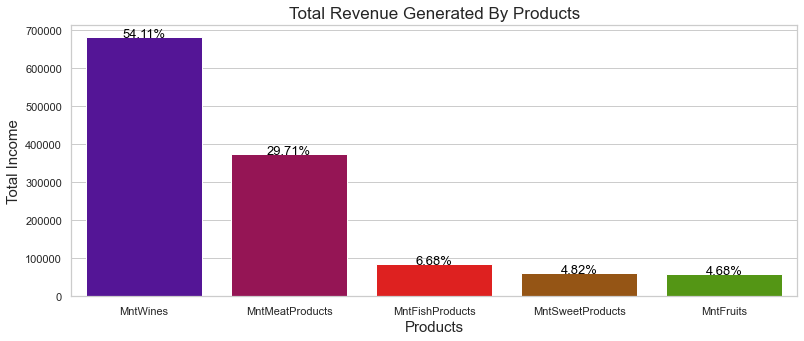

In [61]:
fn.figsize(13, 5)
fn.var_sumy(df = data, var = [col for col in data.columns if "Mnt" in col][:5],  pals = "brg", 
            x_lab = "Products", y_lab = "Total Income", title_f = "Total Revenue Generated By Products")

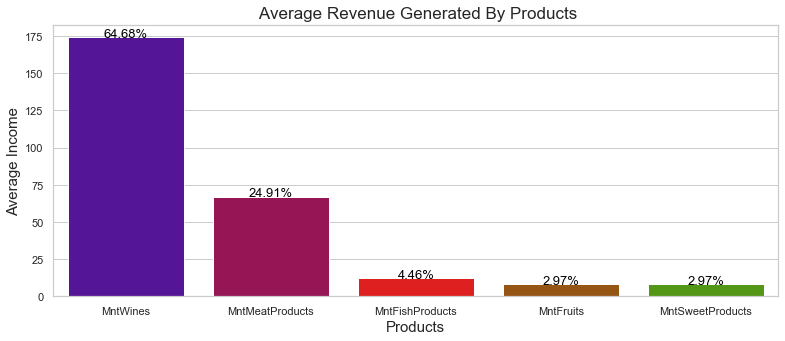

In [62]:
fn.figsize(13, 5)
fn.var_sumy(df = data, var = [col for col in data.columns if "Mnt" in col][:5], fun = "median",  pals = "brg", 
        x_lab= "Products", y_lab = "Average Income", title_f = " Average Revenue Generated By Products")

#### Various Products with Marital Status and Last Campaign Response.

,Marital_Status,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,Total_MntSpent,count
1,Married,435946,235749,53072,38156,36780,861403,1442
2,Single,140300,88211,18779,13174,13068,295093,486
0,Divorced,75349,34840,8123,6218,6357,141601,231
3,Widow,28434,14575,3957,3004,2548,56889,77


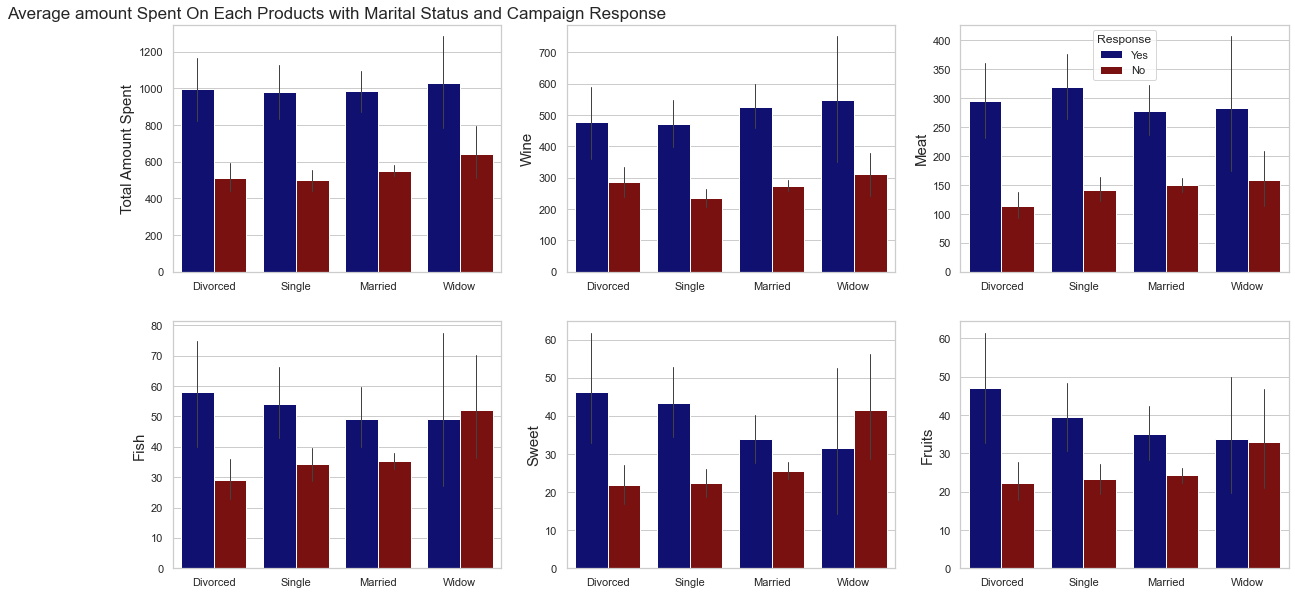

In [63]:
fn.products_vars(data, "Marital_Status", pals = ["navy", "darkred"])

---
#### Number of Dependent in a houshold with various Products and Response to the last Campaign.

,Dependent,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,Total_MntSpent,count
0,0,310146,237163,48733,33789,33260,703794,1125
1,1,301190,111222,30029,22888,21810,533094,637
2,2,59610,21597,4794,3524,3317,103544,421
3,3,9083,3393,375,351,366,14554,53


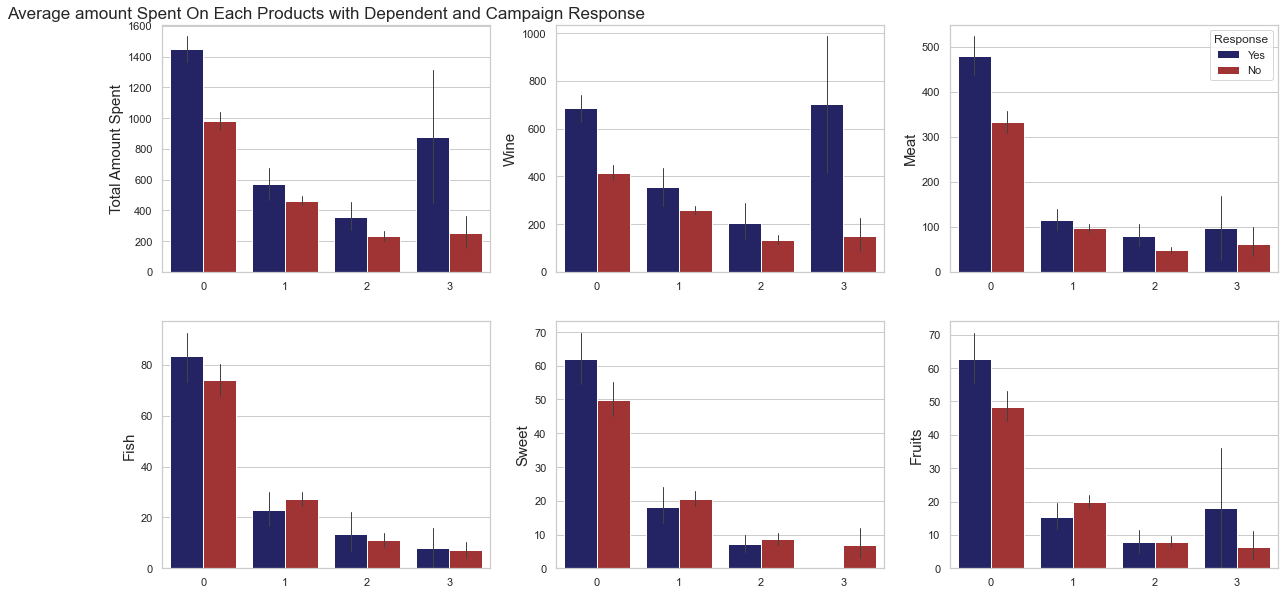

In [64]:
fn.products_vars(data, "Dependent", pals = ["midnightblue", "firebrick"])

-----
#### Customer Country and amount spent on all products with Response to the last Campaign.

,Country,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,Total_MntSpent,count
6,Spain,337236,178480,40161,30150,28302,660367,1094
5,South Africa,105901,58375,13655,9018,8923,210987,335
1,Canada,84649,46148,10028,7678,7746,168532,268
0,Australia,44372,23097,5834,4608,3884,89763,160
3,India,36253,25328,4823,3221,3784,79420,147
2,Germany,37483,20874,4767,2870,3062,74913,120
7,United State,32406,20256,4437,2885,3044,67882,109
4,Mexico,1729,817,226,122,8,3122,3


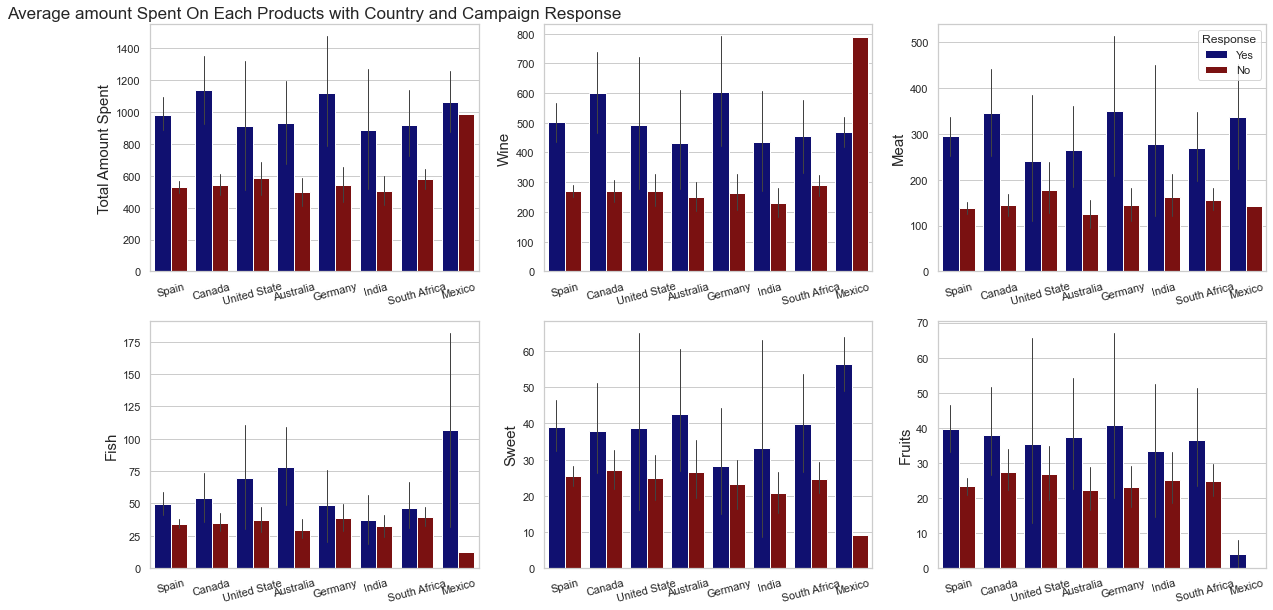

In [65]:
fn.products_vars(data, "Country", pals = ["navy", "darkred"], rot = 15)

---
#### Customer Education level and amount spent on all products with Response to the last Campaign.

,Education,MntWines,MntMeatProducts,MntFishProducts,MntSweetProducts,MntFruits,Total_MntSpent,count
1,Bsc,320362,202266,48622,35350,34669,698564,1126
3,PhD,195830,81379,12886,9764,9600,324938,485
2,Master,123238,60450,11877,7835,8012,226359,370
4,Undergraduate,40208,28662,9625,6949,5872,100708,201
0,Basic,391,618,921,654,600,4417,54


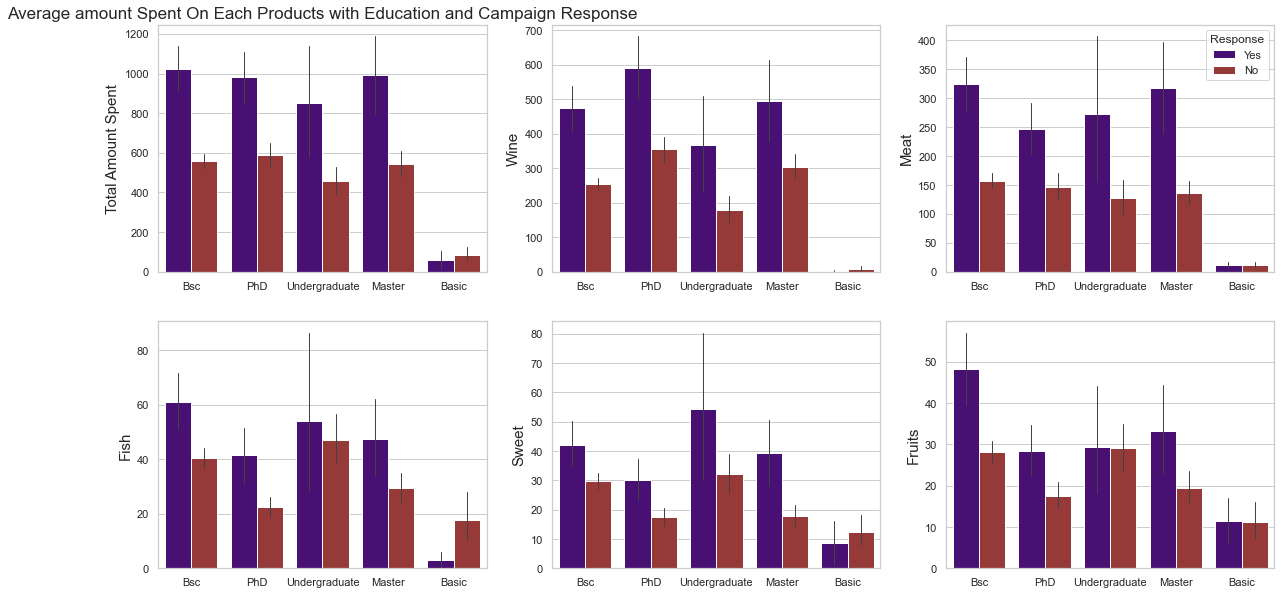

In [66]:
fn.products_vars(data, "Education", pals = ["indigo", "brown"])

A total of 2,611,626 was spent on all products by customers.

54.11% of the total amount spent by customers were on Wine products, 29.71% was spent on Meat product, both of these product makes up 83.82% of all amount spent by customers while Fruit product had the lowest amount spent on a product 4.68%, followed by Sweet product which have 4.82%, Fish Products had The third highest amount 6.68%. 

Note that most customers who responded to the last campaign (Response) spent the most amount on all products.

For the widowed customers the average amount spent by customers who did not respond to the last campaign is higher than customers who responded for Fish and Sweet products.

For customers with Dependents there is a symmentry decrease in the Avreage amount spent on all products as the number of dependents increases except for those with more than 2 dependents (Children and Teenagers)

Most Customers with a basic education did not respond to the last Campaign, and have more average amount spent on each more products than customers that responded.


----
----

### The highest preforming sales Channels used by customers.

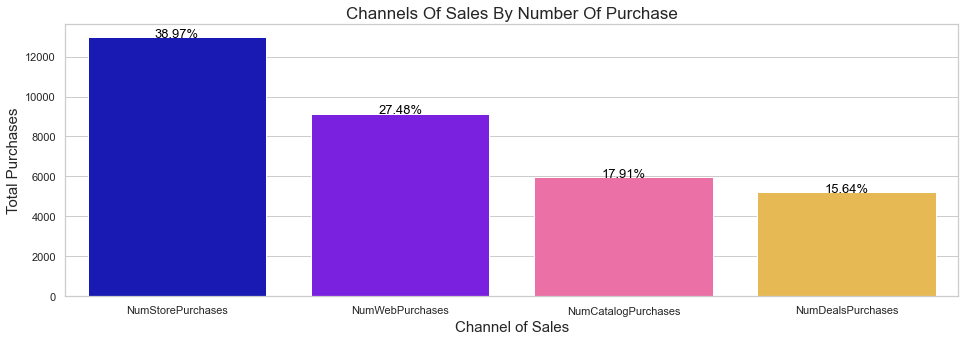

In [67]:
fn.figsize(16, 5)
fn.var_sumy(df = data, var = [col for col in data.columns if "Num" in col][:4], pals = "gnuplot2", x_lab = "Channel of Sales",
            y_lab = "Total Purchases", title_f = "Channels Of Sales By Number Of Purchase")

In [68]:
data["Country"].value_counts().reset_index(name = "Count").rename(columns = {"index": "Country"})

,Country,Count
0,Spain,1094
1,South Africa,335
2,Canada,268
3,Australia,160
4,India,147
5,Germany,120
6,United State,109
7,Mexico,3


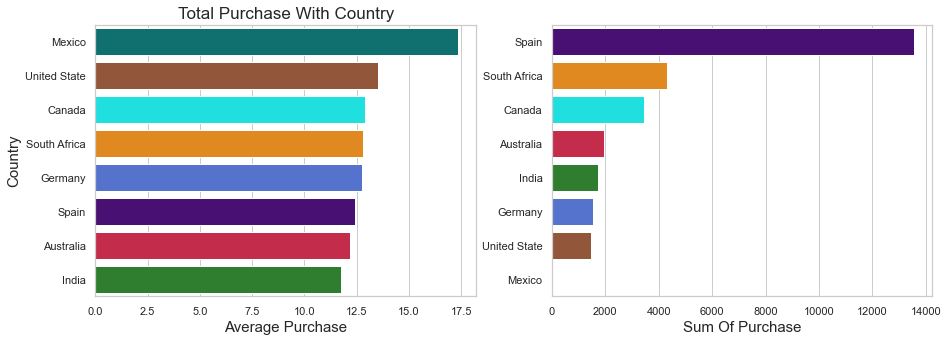

In [69]:
fn.purchase_country(df = data, agg_var = "Total_Purchase")

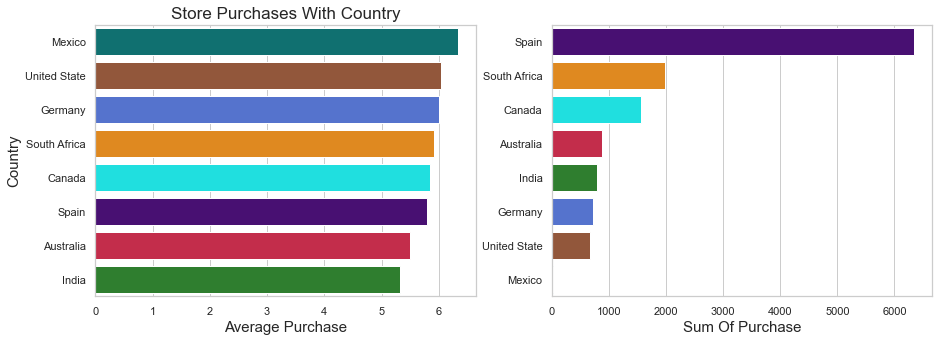

In [70]:
fn.purchase_country(df = data, agg_var = "NumStorePurchases")

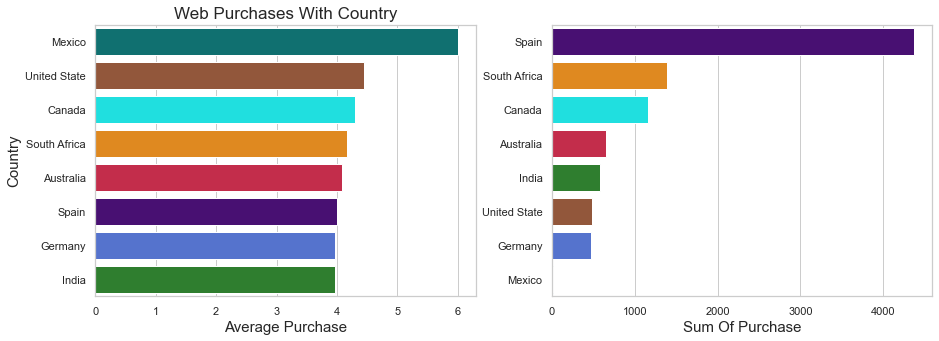

In [71]:
fn.purchase_country(df = data, agg_var = "NumWebPurchases")

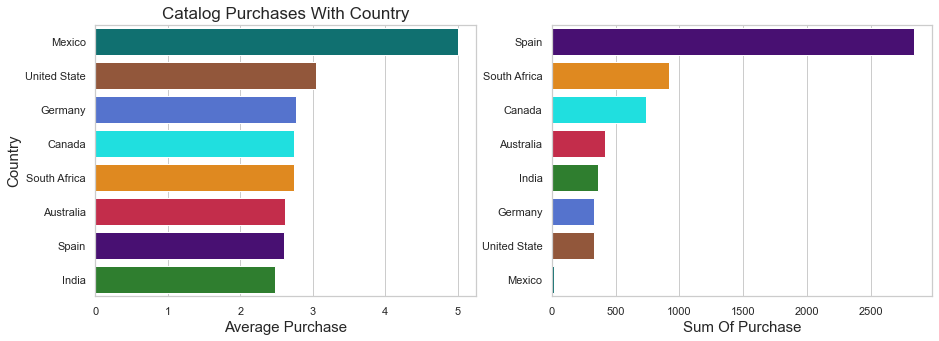

In [72]:
fn.purchase_country(df = data, agg_var = "NumCatalogPurchases")

38.97% of all customer's purchase can from The company's Store, 27.48% came from the company's website, 17.91% came from catalogues, while 15.64% came from deals

The average store purchase for most countries (excluding mexico) ranges from 5 to 6.
The average web purchase for most countries ranges from 3.8 to 4.5.
For catalogue The average purchase ranges from 2.5 to 3.2 for most countries.

The sum of all purchases increases as the count of customers in that paticular country increases.

----
----

### The best performing Campaigns

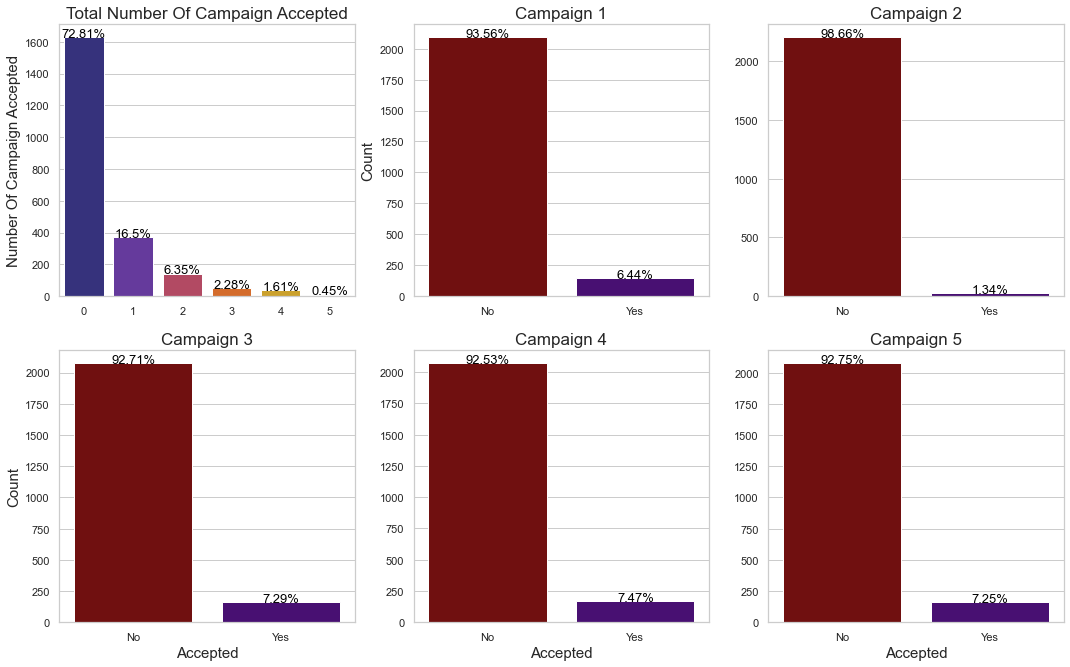

In [73]:
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (18, 11))

fn.campaign_count(data, "Total_Accepted", axi= axis[0,0], y_labc= "Number Of Campaign Accepted", palc = "CMRmap")
fn.campaign_count(data, "AcceptedCmp1", axi = axis[0,1], y_labc = "Count", palc = pai)
fn.campaign_count(data, "AcceptedCmp2", axi = axis[0,2], palc = pai)
fn.campaign_count(data, "AcceptedCmp3", axi = axis[1,0], x_labc = "Accepted", y_labc = "Count", palc = pai)
fn.campaign_count(data, "AcceptedCmp4", axi = axis[1,1], x_labc = "Accepted", palc = pai)
fn.campaign_count(data, "AcceptedCmp5", axi = axis[1,2], x_labc = "Accepted", palc = pai)

----
#### Campaign with Amount spent on each products.

<|Total Amount Spent on all Products for customers who Accepted the Fifth Campaign is 249,128.0|> 



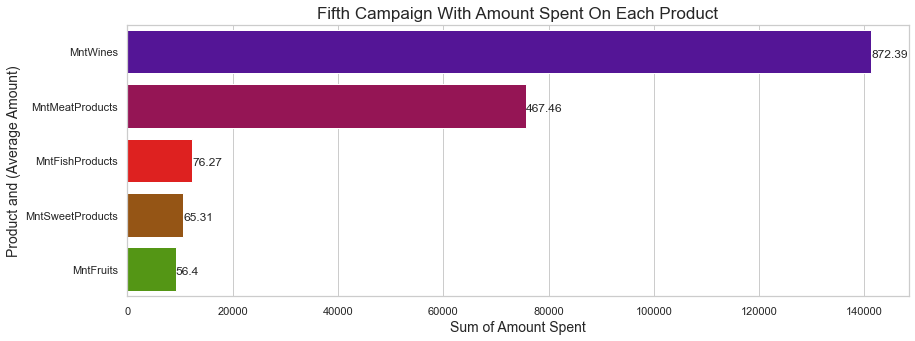

In [74]:
fn.campaign_product(data, "AcceptedCmp5")

<|Total Amount Spent on all Products for customers who Accepted the First Campaign is 202,333.0|> 



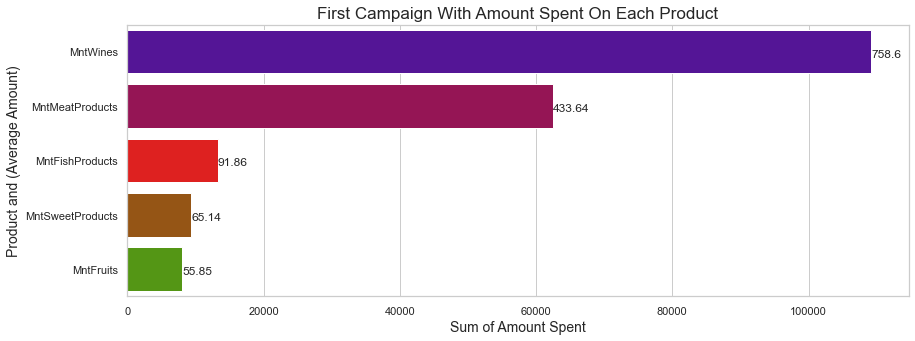

In [75]:
fn.campaign_product(data, "AcceptedCmp1")

<|Total Amount Spent on all Products for customers who Accepted the Second Campaign is 37,238.0|> 



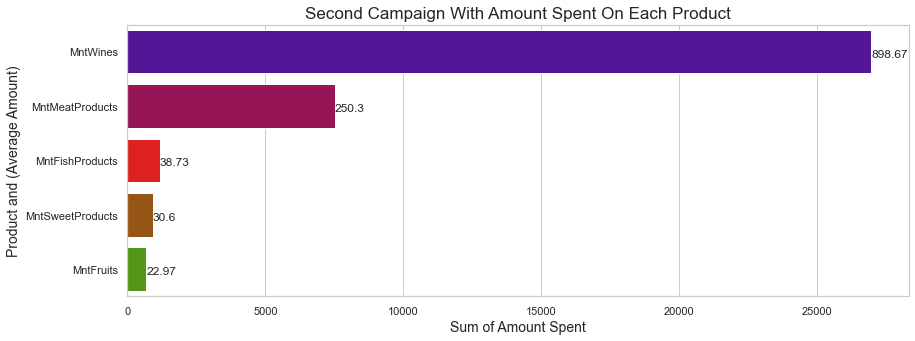

In [76]:
fn.campaign_product(data, "AcceptedCmp2")

<|Total Amount Spent on all Products for customers who Accepted the Third Campaign is 106,537.0|> 



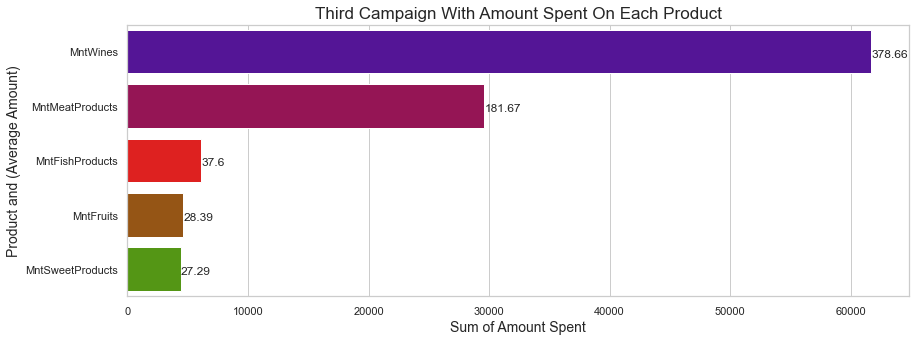

In [77]:
fn.campaign_product(data, "AcceptedCmp3")

<|Total Amount Spent on all Products for customers who Accepted the Fourth Campaign is 182,867.0|> 



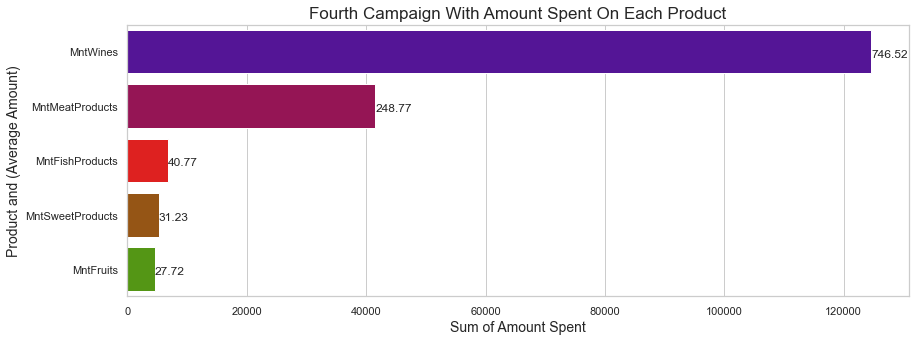

In [78]:
fn.campaign_product(data, "AcceptedCmp4")

#### Response

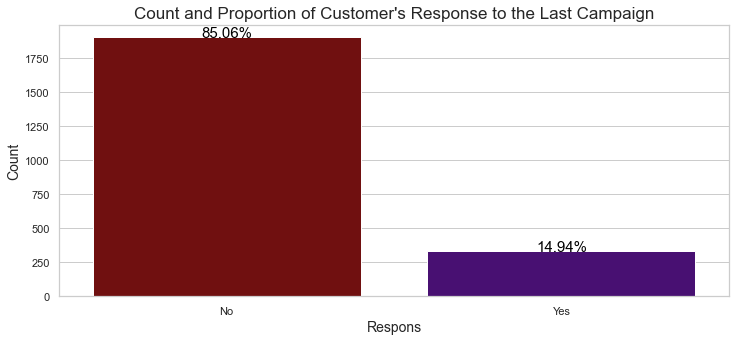

In [79]:
cr = data["Response"].value_counts().reset_index(name = "count")
cr["prop"] = fn.prop_table(cr, "count")

fn.figsize(12, 5)
crx = sns.barplot(data = cr, x = "index", y = "count", palette = pai)
fn.labs(xlabel= "Respons", ylabel= "Count", title = "Count and Proportion of Customer's Response to the Last Campaign", t_loc = "left")
fn.bar_text(df = cr, ax = crx, count_var = "count", prop_var = "prop", single= True, fs = 15)

72.81% of all customers did not accept any campaign while just 0.45% accepted all 5 Campaigns.

* Campaign 2 had the lowest acceptance rate with just 1.34% of all customers responding to it.
* Campaign 4 had the second highest acceptance rate with 7.47% Responding to it.
* Response to the last Campaign had the highest acceptance rate with 14.94% responding to it.

The most successful Campaigns are the this order Campaign 4, 3, 5, 1 and then Campaign 2.

For Amount Spent on each products ::>
> For Wine product campaign 5 had the highest amount spent given the total amount to the average.

> For Meat product campaign 5 had the highest amount spent also.

> For Fish product campaign 1 had the highest amount spent.

> For Sweet product campaign 5 had the highest amount spent.

> For Fruits product campaign 5 had the highest amount spent 

----
----
----

### Correlation

Text(0.5, 1.03, 'Correlation Of Features')

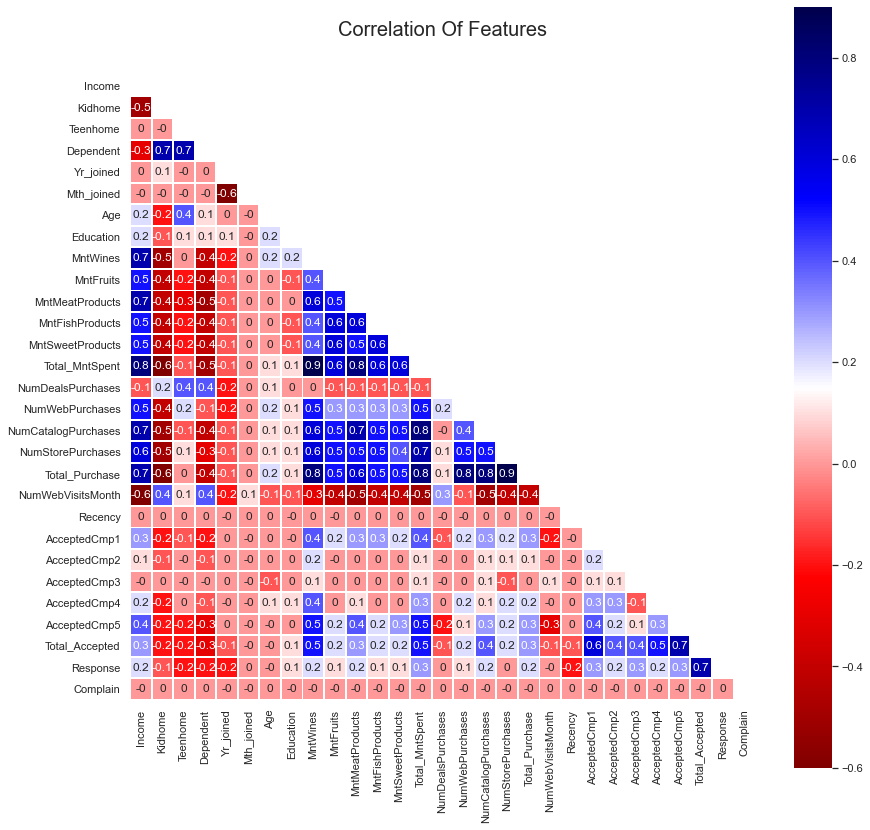

In [80]:
smt = data.copy()
smt["Mth_joined"] = smt["Mth_joined"].replace(dict(zip(data.Mth_joined.cat.categories.to_list(), range(12))))
smt["Education"] = smt["Education"].replace({"Basic":0, "Undergraduate":1, "Bsc":2, "Master":3, "PhD":4})
smt["Age_cat"] = smt["Age_cat"].replace({"-36":0, "36-42":1, "43-50":2, "51-60":3, "61-":4})

for i in [col for col in smt.columns if "Accepted" in col][:5]+['Response', 'Complain']:
    smt[i] = smt[i].replace({"No":0, "Yes":1})
    
smt = smt.drop(columns = ["Dt_Enroll", "Country", "Marital_Status"], axis = 1)
cor_df = round(smt.corr(), 1)


cor_df = pd.DataFrame(cor_df)

mask = np.zeros_like(cor_df)
mask[np.triu_indices_from(mask)] = True

fn.figsize(14, 14)
sns.heatmap(data = cor_df, annot = True, mask = mask, linewidths = .9, cmap = "seismic_r", square = True)
plt.title("Correlation Of Features", y = 1.03, fontsize = 20, pad = 20)

## Insight



More product promotions should be done during the month of July to August.
  
Better promotional campaign should be created for customers within the age of 35 years to 50 years.  
An improved user experience for the Company's website will improve usage/transcation traffic by younger users.  
  
Campaings should include more key customers target groups in order to improve it repsonsiveness to the market.  
  
The company needs to increase incentives or deals for customers with low household income in order to increse salse from low income households.   
    
More and better marketing campaigns should be done in countries such as the  United State, Australia, Germany, India and especially
Mexico to improve the company's market share.  
  
Buliding proper market segmentation to increase the amount of sales of fish, sweet and fruit products. 

Given the high amount of purchase made in Spain, South Africa and Canada, more product placement should be done to improve the average amount spent by customers in those countries.